# Trade&Ahead

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. Data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange has been provided. Objective is to analyze the data, group the stocks based on the attributes provided, and share insights about the characteristics of each group.

## Data Description

* Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* Security: Name of the company
* GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* Current Price: Current stock price in dollars
* Price Change: Percentage change in the stock price in 13 weeks
* Volatility: Standard deviation of the stock price over the past 13 weeks
* ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
* Net Income: Revenues minus expenses, interest, and taxes (in dollars)
* Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* Estimated Shares Outstanding: Company's stock currently held by all its shareholders
* P/E Ratio: Ratio of the company's current stock price to the earnings per share
* P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [650]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to compute distances
from scipy.spatial.distance import pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Data Overview

## Loading Data

In [651]:
data1 = pd.read_csv("stock_data.csv")  # Reading data file
data = data1  # copying data
data.head()  # first five rows of data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [652]:
data.shape

(340, 15)

<IPython.core.display.Javascript object>

* There a 340 rows and 15 columns

In [653]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

* 11 rows are numeric and rest are object types

In [654]:
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate rows

In [655]:
data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values

In [656]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Price,340.0,8.086234e+01,9.805509e+01,4.500000e+00,3.855500e+01,5.970500e+01,9.288000e+01,1.274950e+03
Price Change,340.0,4.078194e+00,1.200634e+01,-4.712969e+01,-9.394838e-01,4.819505e+00,1.069549e+01,5.505168e+01
Volatility,340.0,1.525976e+00,5.917984e-01,7.331632e-01,1.134878e+00,1.385593e+00,1.695549e+00,4.580042e+00
ROE,340.0,3.959706e+01,9.654754e+01,1.000000e+00,9.750000e+00,1.500000e+01,2.700000e+01,9.170000e+02
Cash Ratio,340.0,7.002353e+01,9.042133e+01,0.000000e+00,1.800000e+01,4.700000e+01,9.900000e+01,9.580000e+02
Net Cash Flow,340.0,5.553762e+07,1.946365e+09,-1.120800e+10,-1.939065e+08,2.098000e+06,1.698108e+08,2.076400e+10
Net Income,340.0,1.494385e+09,3.940150e+09,-2.352800e+10,3.523012e+08,7.073360e+08,1.899000e+09,2.444200e+10
Earnings Per Share,340.0,2.776662e+00,6.587779e+00,-6.120000e+01,1.557500e+00,2.895000e+00,4.620000e+00,5.009000e+01
Estimated Shares Outstanding,340.0,5.770283e+08,8.458496e+08,2.767216e+07,1.588482e+08,3.096751e+08,5.731175e+08,6.159292e+09
P/E Ratio,340.0,3.261256e+01,4.434873e+01,2.935451e+00,1.504465e+01,2.081988e+01,3.176476e+01,5.280391e+02


<IPython.core.display.Javascript object>

* Some columns have negative values and positive values.

In [657]:
data.describe(exclude="number").T

,count,unique,top,freq
Ticker Symbol,340,340,GRMN,1
Security,340,340,Baker Hughes Inc,1
GICS Sector,340,11,Industrials,53
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16


<IPython.core.display.Javascript object>

* Ticker symbol and Security have all unique values.

# EDA

### Univariate Analysis

In [658]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [659]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

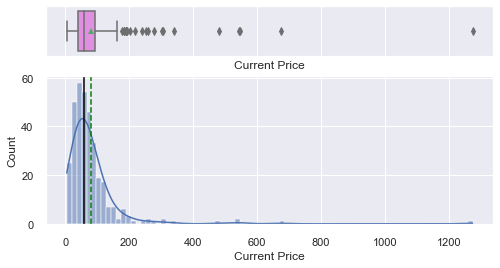

<IPython.core.display.Javascript object>

In [660]:
histogram_boxplot(data, "Current Price", kde=True, figsize=(8, 4))

* Stock Price is highly right skewed.
* There are some outliers.

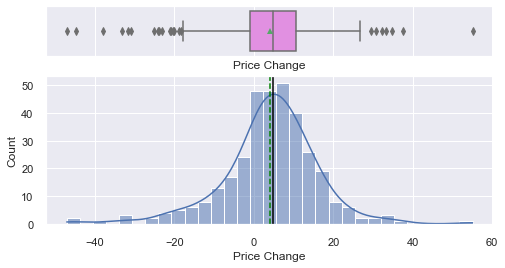

<IPython.core.display.Javascript object>

In [661]:
histogram_boxplot(data, "Price Change", kde=True, figsize=(8, 4))

* Price Change has normal distribution.
* There are some outliers.

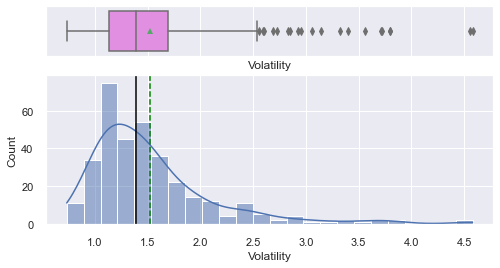

<IPython.core.display.Javascript object>

In [662]:
histogram_boxplot(data, "Volatility", kde=True, figsize=(8, 4))

* Volatility is right skewed.
* There are some outliers.

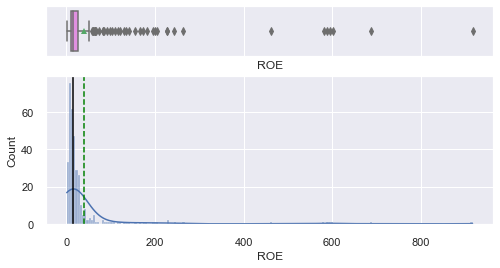

<IPython.core.display.Javascript object>

In [663]:
histogram_boxplot(data, "ROE", kde=True, figsize=(8, 4))

* ROE is highly right skewed.
* There are many outliers.

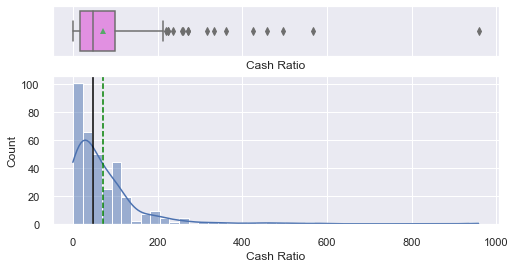

<IPython.core.display.Javascript object>

In [664]:
histogram_boxplot(data, "Cash Ratio", kde=True, figsize=(8, 4))

* Cash Ratio is highly right skewed.
* There are some outliers.

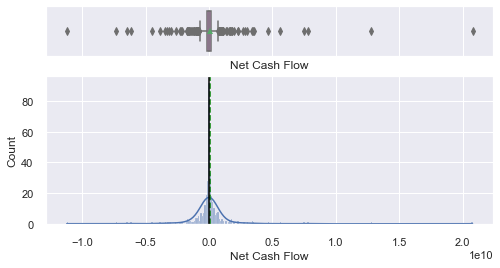

<IPython.core.display.Javascript object>

In [665]:
histogram_boxplot(data, "Net Cash Flow", kde=True, figsize=(8, 4))

* Net Cash Flow has a normal distribution.
* There are many outliers.

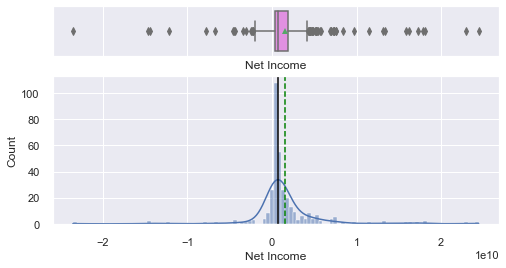

<IPython.core.display.Javascript object>

In [666]:
histogram_boxplot(data, "Net Income", kde=True, figsize=(8, 4))

* Net Income has an almost normal distribution.
* There are many outliers.

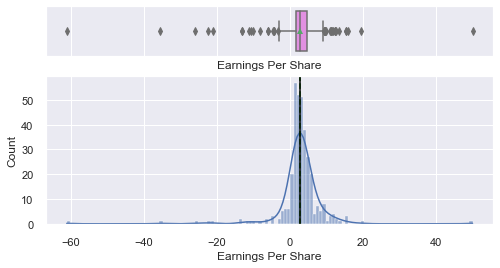

<IPython.core.display.Javascript object>

In [667]:
histogram_boxplot(data, "Earnings Per Share", kde=True, figsize=(8, 4))

* Earnings Per Share has an almost normal distribution.
* There are many outliers.

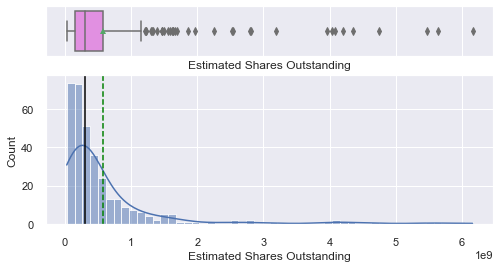

<IPython.core.display.Javascript object>

In [668]:
histogram_boxplot(data, "Estimated Shares Outstanding", kde=True, figsize=(8, 4))

* Estimated Shares Outstanding is highly right skewed.
* There are some outliers.

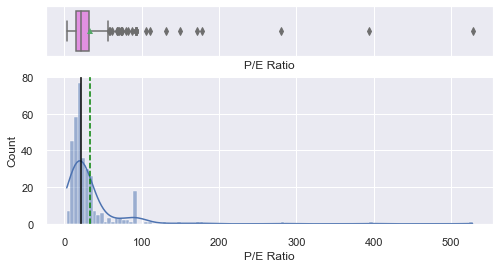

<IPython.core.display.Javascript object>

In [669]:
histogram_boxplot(data, "P/E Ratio", kde=True, figsize=(8, 4))

* P/E Ratio is highly right skewed.
* There are some outliers.

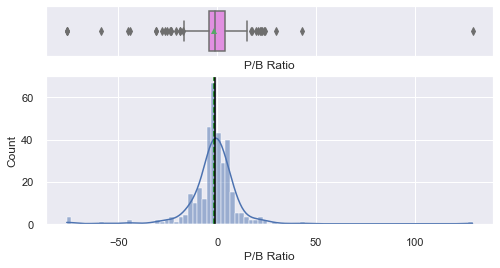

<IPython.core.display.Javascript object>

In [670]:
histogram_boxplot(data, "P/B Ratio", kde=True, figsize=(8, 4))

* P/B Ratio has an almost normal distribution.
* There are many outliers.

**Ticker Symbol** and **Security** have unique values.

In [671]:
data["GICS Sub Industry"].nunique()

104

<IPython.core.display.Javascript object>

**GICS Sub Industry has 104 unique values**

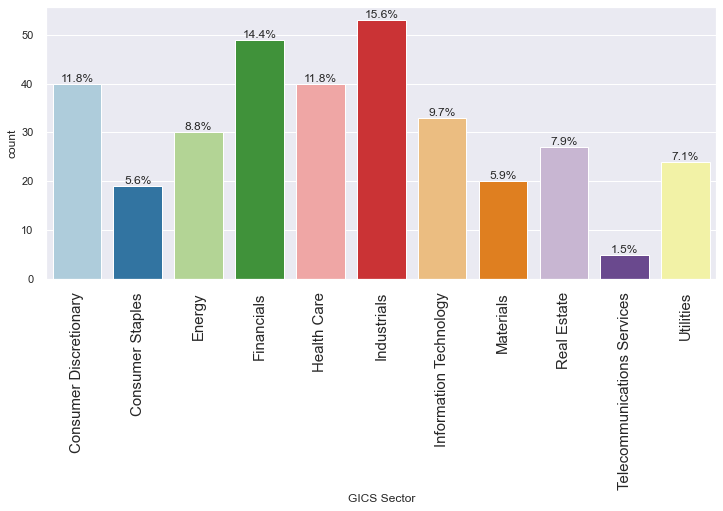

<IPython.core.display.Javascript object>

In [672]:
labeled_barplot(data, "GICS Sector", perc=True)

### Bivariate Analysis

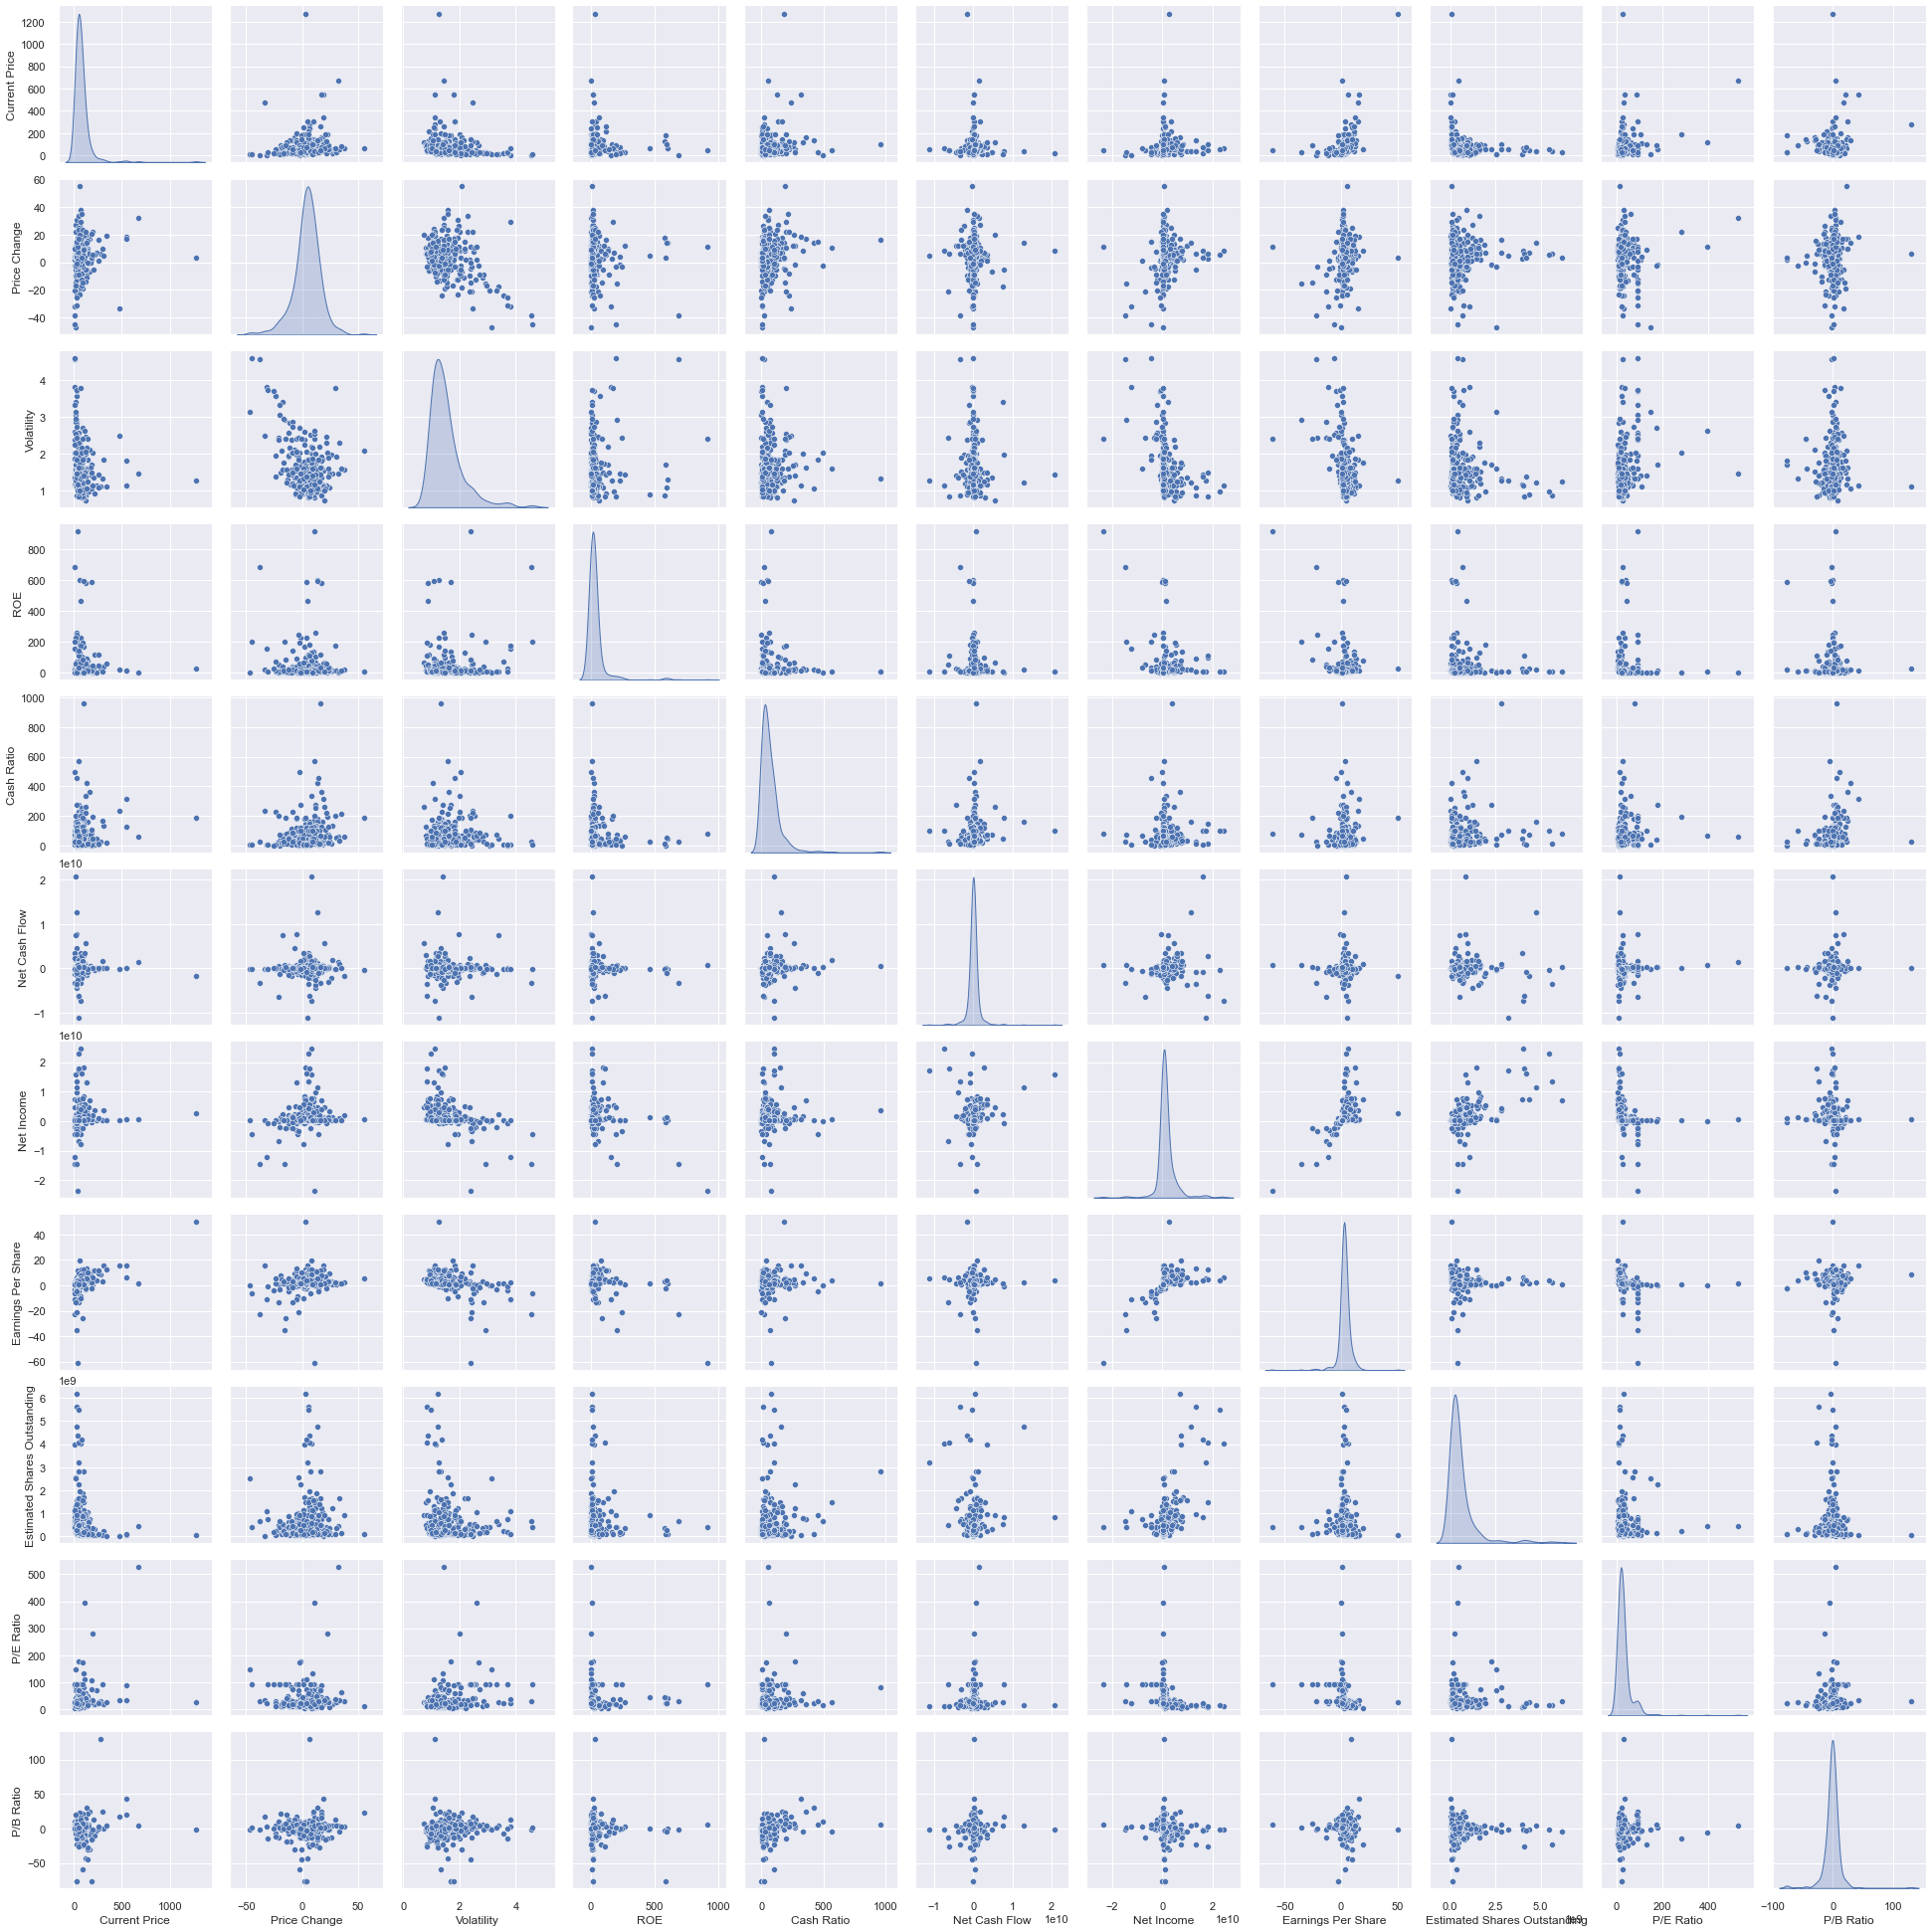

<IPython.core.display.Javascript object>

In [673]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

<AxesSubplot:xlabel='GICS Sector'>

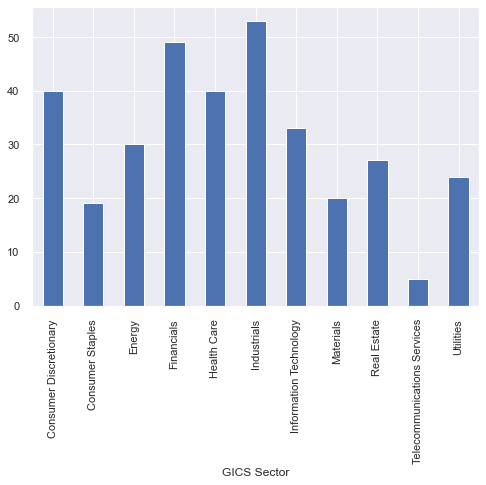

<IPython.core.display.Javascript object>

In [674]:
data.groupby("GICS Sector")["GICS Sub Industry"].count().plot.bar()

<AxesSubplot:xlabel='GICS Sector', ylabel='Net Cash Flow'>

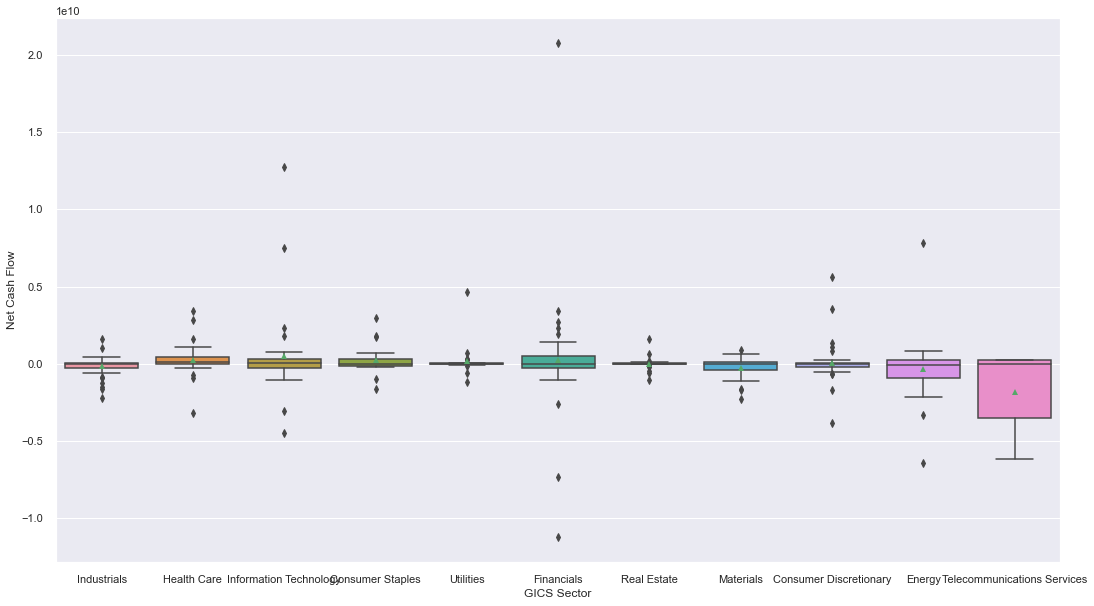

<IPython.core.display.Javascript object>

In [675]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="Net Cash Flow", showmeans=True)

<AxesSubplot:xlabel='GICS Sector', ylabel='Net Income'>

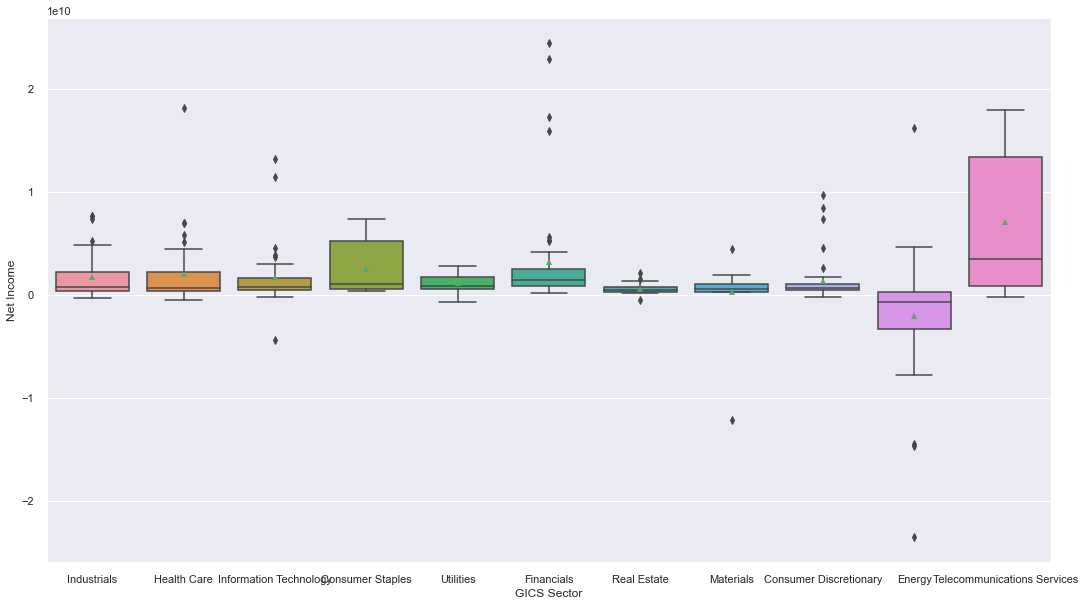

<IPython.core.display.Javascript object>

In [676]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="Net Income", showmeans=True)

* Mean values are close to 0 for both Net Cash flow and Net income in all sectors
* There are few outliers in all sectors except Telecommunication Services

**Questions**:

1. What does the distribution of stock prices look like?

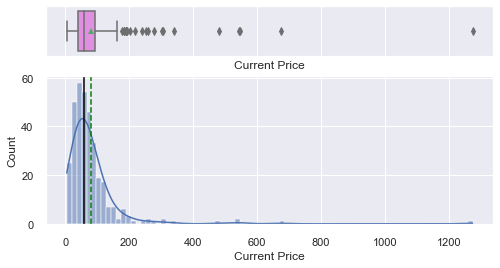

<IPython.core.display.Javascript object>

In [677]:
histogram_boxplot(data, "Current Price", kde=True, figsize=(8, 4))

* Stock Price is highly right skewed.
* There are many outliers.

2. The stocks of which economic sector have seen the maximum price increase on average?

In [678]:
data.groupby("GICS Sector")["Price Change"].mean()

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='GICS Sector', ylabel='Price Change'>

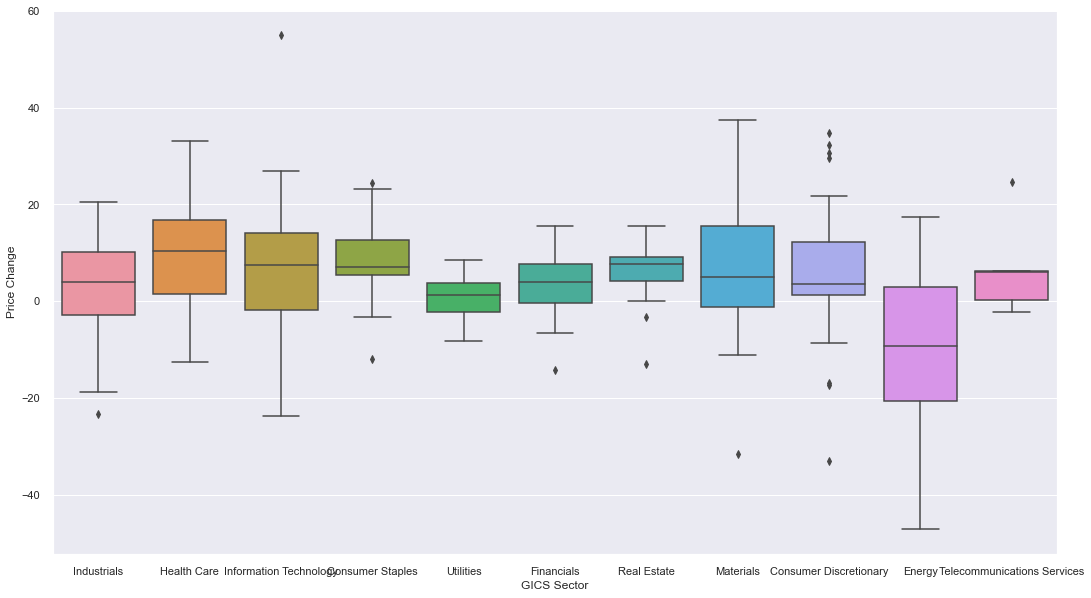

<IPython.core.display.Javascript object>

In [679]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="Price Change")

**Health care** has seen the Maximum Price increase on average

3. How are the different variables correlated with each other?

In [680]:
data.corr()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Current Price,1.000000,0.134982,-0.124257,-0.000549,0.127816,-0.021961,0.036625,0.479604,-0.145306,0.260273,0.124634
Price Change,0.134982,1.000000,-0.408281,-0.043310,0.168586,0.026746,0.179298,0.175401,0.033656,-0.002491,0.034329
Volatility,-0.124257,-0.408281,1.000000,0.162532,0.020605,-0.014172,-0.383433,-0.379309,-0.095704,0.263600,0.046528
ROE,-0.000549,-0.043310,0.162532,1.000000,-0.069122,-0.052205,-0.288524,-0.405291,-0.030288,0.023341,-0.063218
Cash Ratio,0.127816,0.168586,0.020605,-0.069122,1.000000,0.113819,0.028589,0.024759,0.135869,0.089483,0.229672
Net Cash Flow,-0.021961,0.026746,-0.014172,-0.052205,0.113819,1.000000,0.044229,0.019348,-0.051392,0.026876,0.057039
Net Income,0.036625,0.179298,-0.383433,-0.288524,0.028589,0.044229,1.000000,0.557752,0.589310,-0.224022,-0.061544
Earnings Per Share,0.479604,0.175401,-0.379309,-0.405291,0.024759,0.019348,0.557752,1.000000,-0.026906,-0.260660,0.014915
Estimated Shares Outstanding,-0.145306,0.033656,-0.095704,-0.030288,0.135869,-0.051392,0.589310,-0.026906,1.000000,-0.014551,-0.028155
P/E Ratio,0.260273,-0.002491,0.263600,0.023341,0.089483,0.026876,-0.224022,-0.260660,-0.014551,1.000000,0.036422


<IPython.core.display.Javascript object>

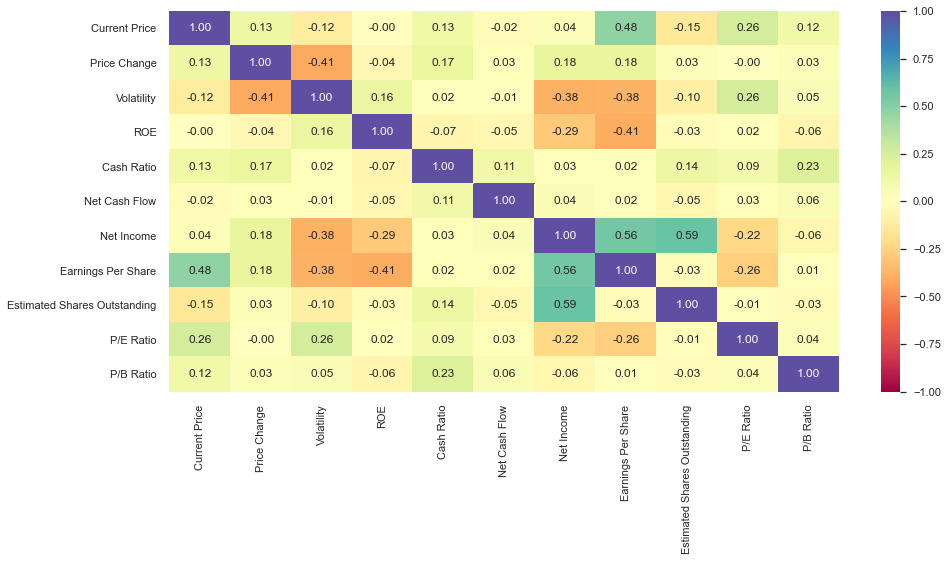

<IPython.core.display.Javascript object>

In [681]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* None of the numeric variables have high correlation with any other.
* Net Income has around 0.60 correlation with Earnings per Share and Estimated Shares Outstanding.

4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?

<AxesSubplot:xlabel='GICS Sector', ylabel='Cash Ratio'>

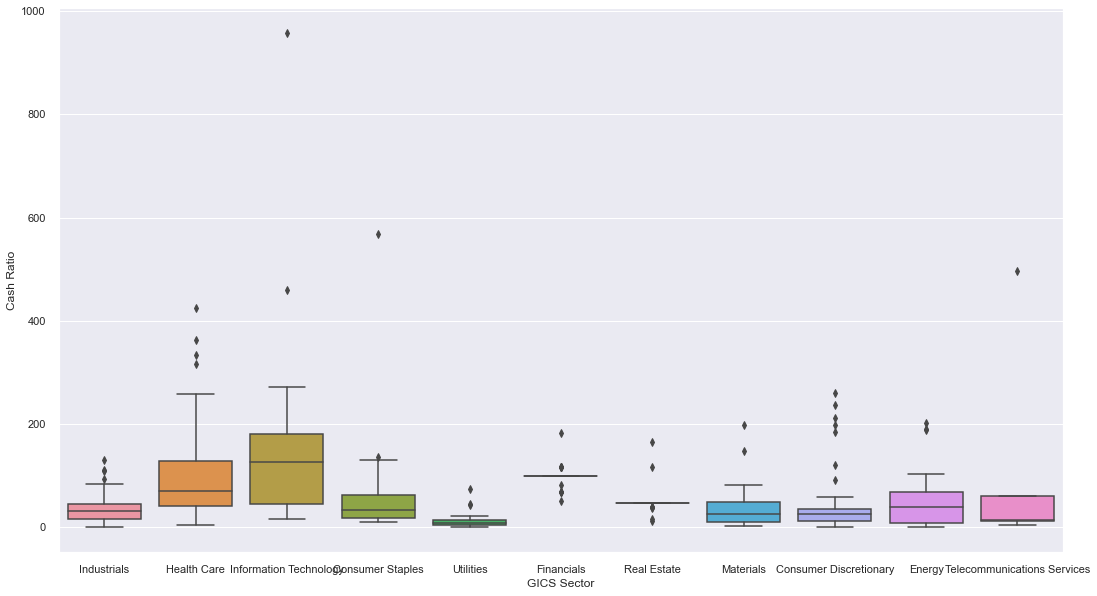

<IPython.core.display.Javascript object>

In [682]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="Cash Ratio")

* Cash Ratio has the highest value in Information Technology Sector.
* It varies similarly in Industrials, Consumer Staples, Materials, Consumer Discretionary, Energy and Telecommunication Services.

5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

<AxesSubplot:xlabel='GICS Sector', ylabel='P/E Ratio'>

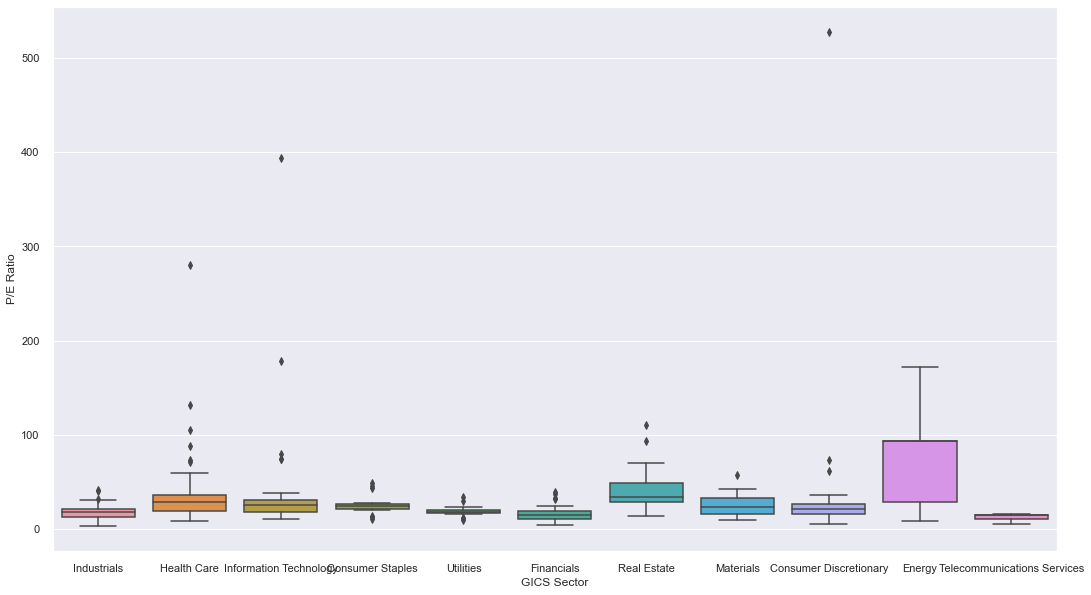

<IPython.core.display.Javascript object>

In [683]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="P/E Ratio")

* P/E Ratio has the highest value in Consumer Discretionary Sector.
* All other Sectors vary similarly with few outliers.

## Data Preprocessing

### Outlier Detection

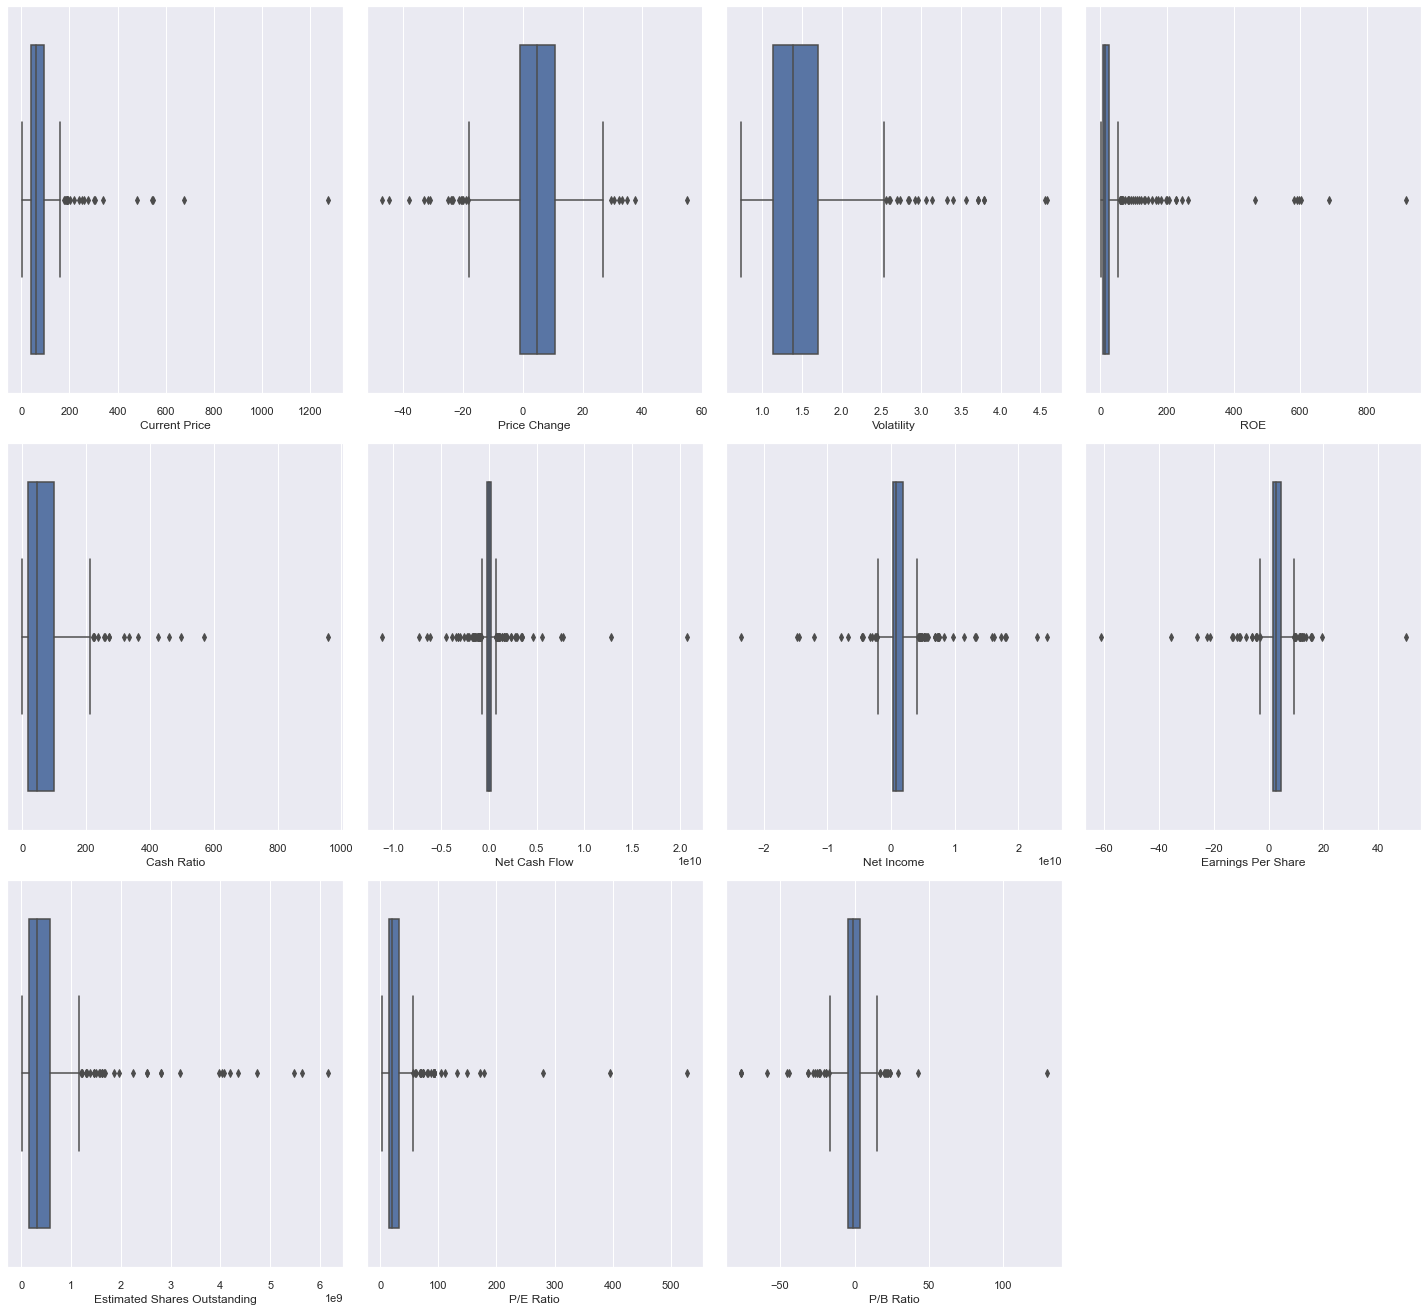

<IPython.core.display.Javascript object>

In [684]:
# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))
for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5, orient="h")  # whisker 1.5 x iqr
    plt.tight_layout()

plt.show()


In [685]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [686]:
df = treat_outliers_all(data, num_col)  # treat them


<IPython.core.display.Javascript object>

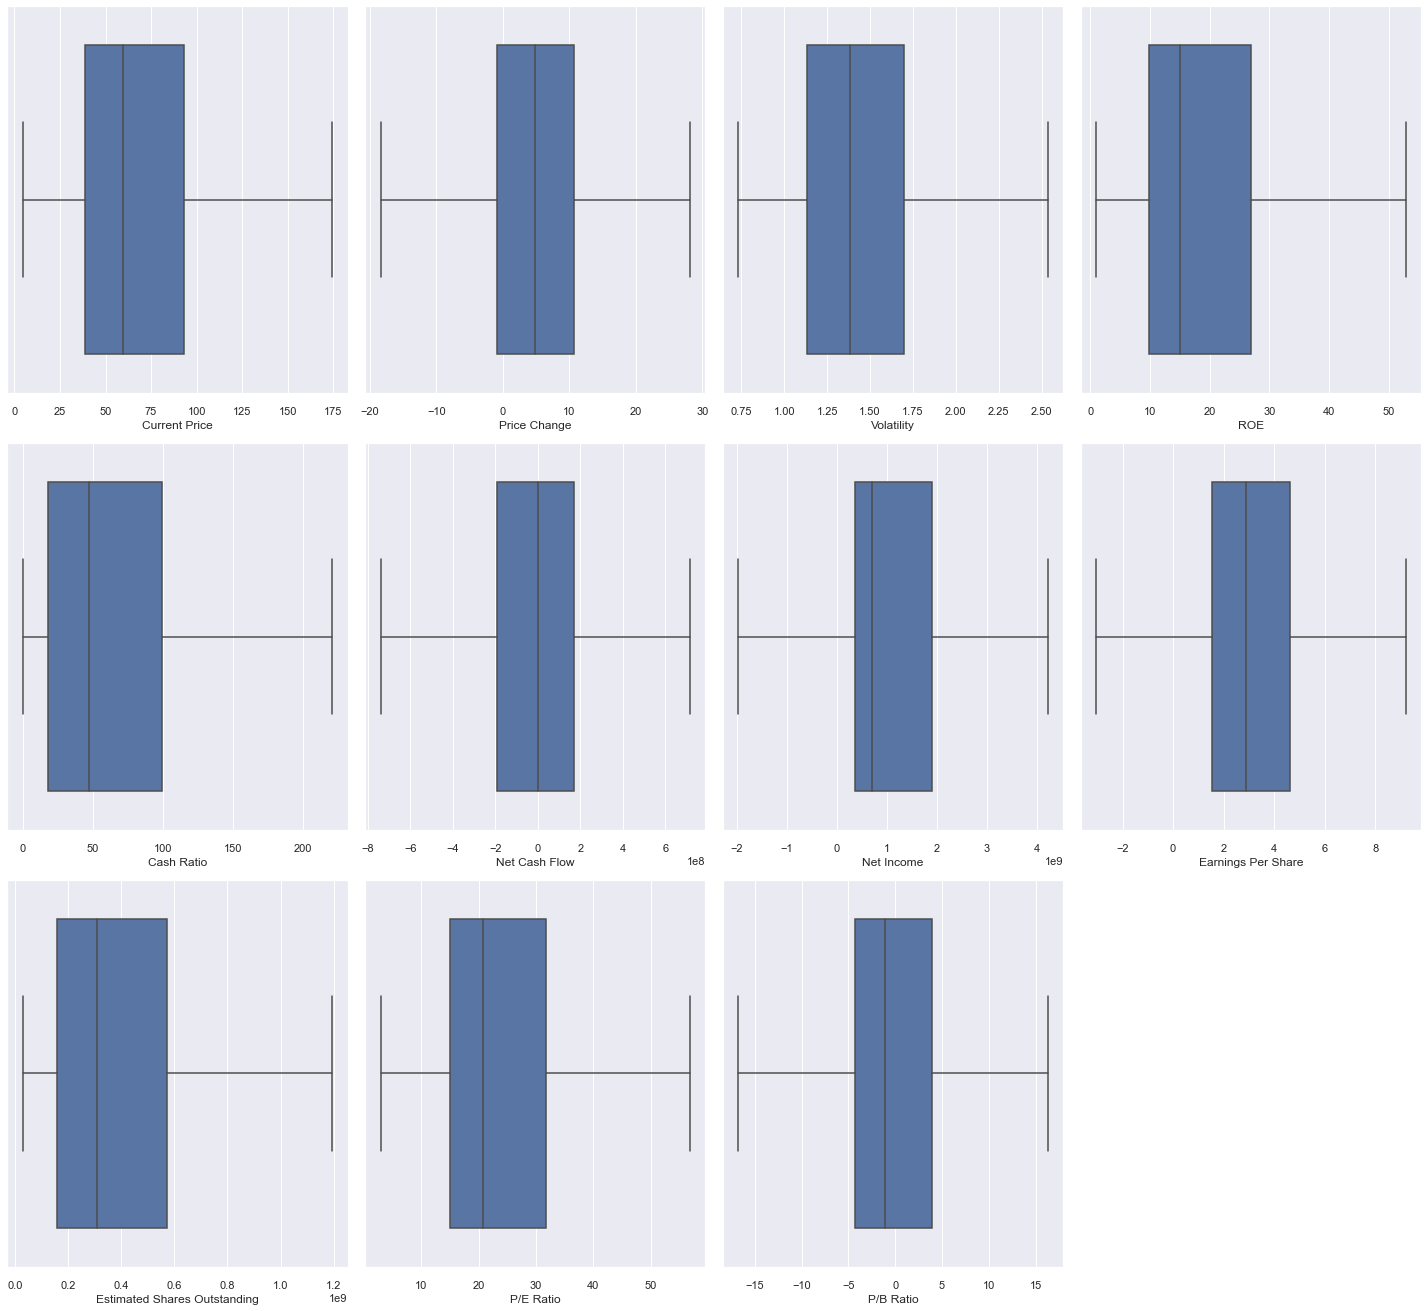

<IPython.core.display.Javascript object>

In [687]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_col):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(data[variable], whis=1.5)
    plt.tight_layout()

plt.show()


### Feature Engineering

No columns are removed as all are necessary and only numeric columns are being used.

### Feature Scaling

In [688]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [689]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [690]:
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.650712,0.549287,0.448212,2.116831,-0.207311,-1.433763,1.977138,2.114902,0.645054,-1.493768,-0.997339
1,-0.257962,0.387909,1.568844,2.116831,0.238584,0.133007,1.977138,0.017981,2.124799,-0.462139,-0.992836
2,-0.591183,0.675734,-0.459081,0.031532,0.067086,1.722229,1.977138,-0.054640,2.124799,-0.703554,0.108970
3,0.548932,0.935802,-0.274700,-0.753522,2.005016,-0.565079,-0.371735,-0.635605,0.171420,2.138684,0.714710
4,-0.349115,-0.600175,0.478969,-0.426416,2.699583,0.764786,-0.327678,-0.964127,2.124799,2.138684,0.300691


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

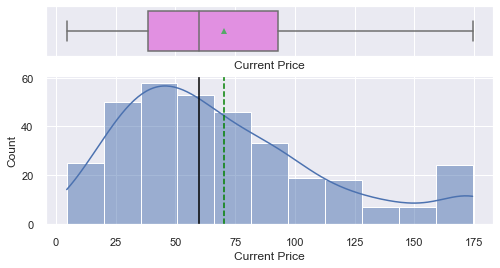

<IPython.core.display.Javascript object>

In [691]:
histogram_boxplot(data, "Current Price", kde=True, figsize=(8, 4))

Current Price is now slightly right skewed.

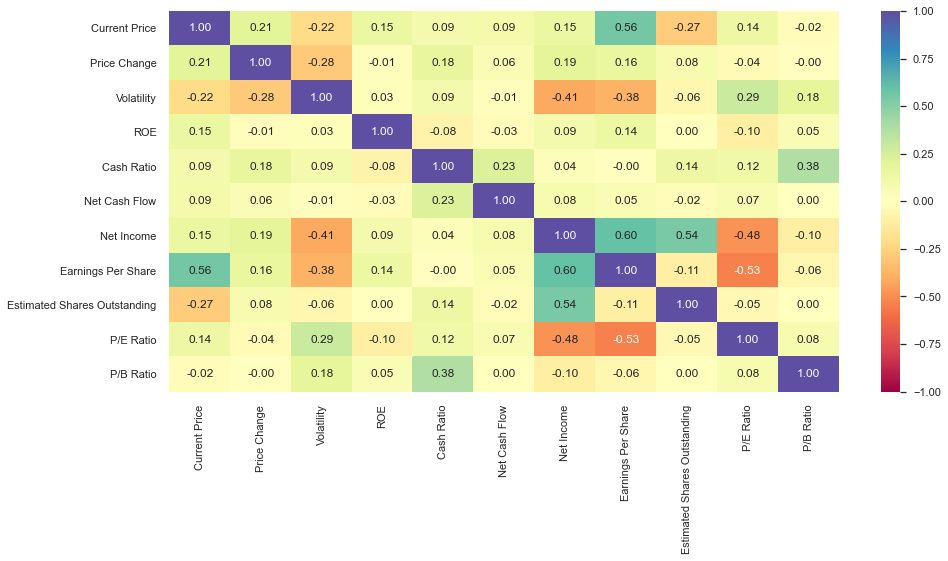

<IPython.core.display.Javascript object>

In [692]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Correlation has not changed much

<AxesSubplot:xlabel='GICS Sector', ylabel='Cash Ratio'>

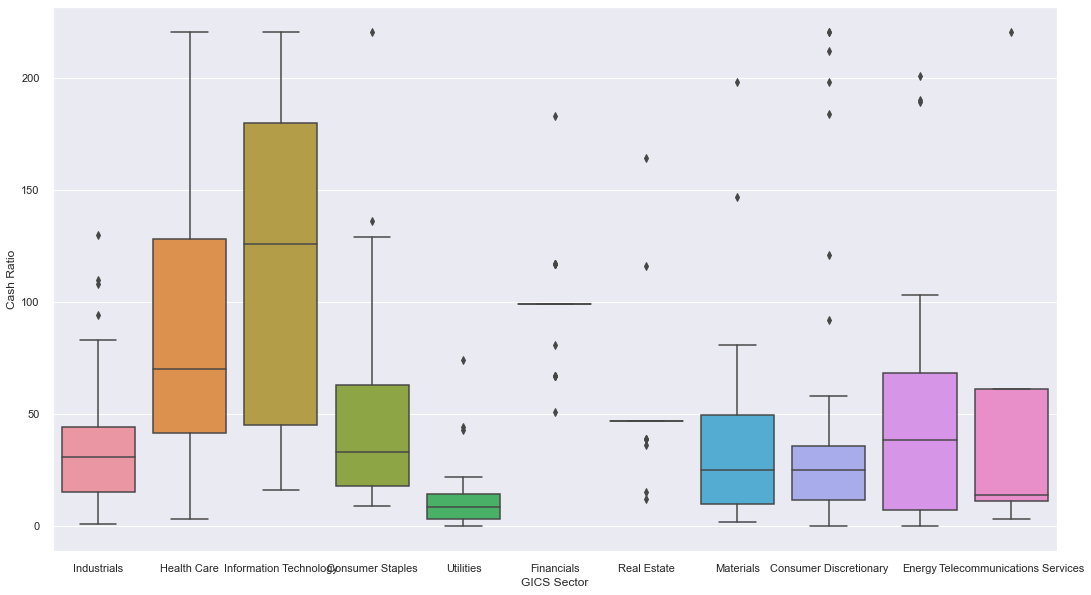

<IPython.core.display.Javascript object>

In [693]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="Cash Ratio")

Cash Ratio varies upto about 250 and more evenly spread out within the sectors

<AxesSubplot:xlabel='GICS Sector', ylabel='P/E Ratio'>

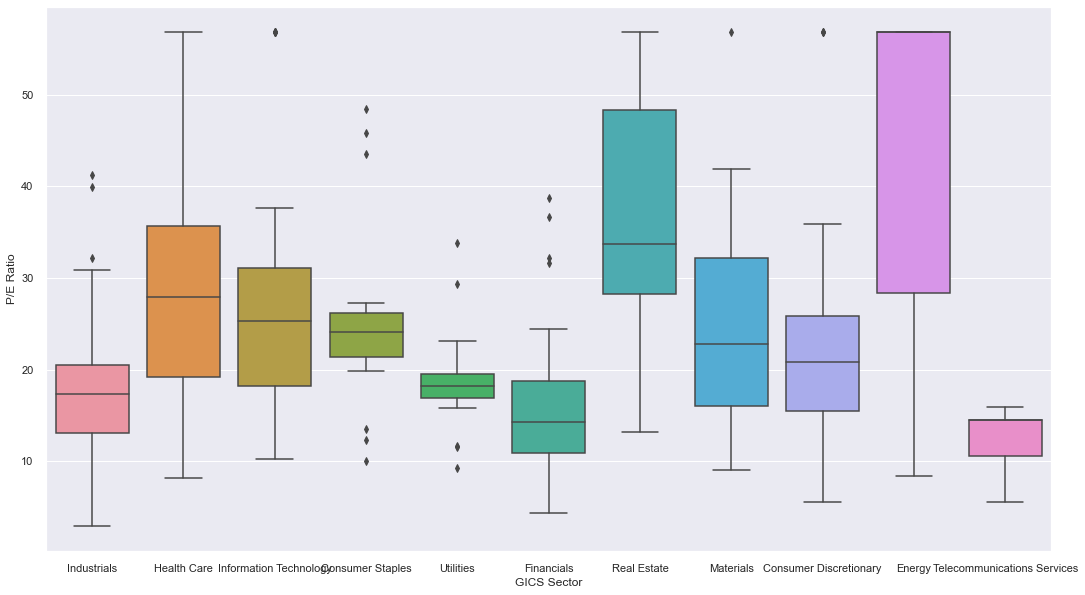

<IPython.core.display.Javascript object>

In [694]:
plt.figure(figsize=(18, 10))
sns.boxplot(data=data, x="GICS Sector", y="P/E Ratio")

P/E Ratio varies upto about 55 and more evenly spread out within the sectors

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.951402079172521
Number of Clusters: 3 	Average Distortion: 2.75880012922971
Number of Clusters: 4 	Average Distortion: 2.6315125956684655
Number of Clusters: 5 	Average Distortion: 2.532711064377337
Number of Clusters: 6 	Average Distortion: 2.4712495507087393
Number of Clusters: 7 	Average Distortion: 2.393501322632654
Number of Clusters: 8 	Average Distortion: 2.330688987026425
Number of Clusters: 9 	Average Distortion: 2.2925421903140153


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

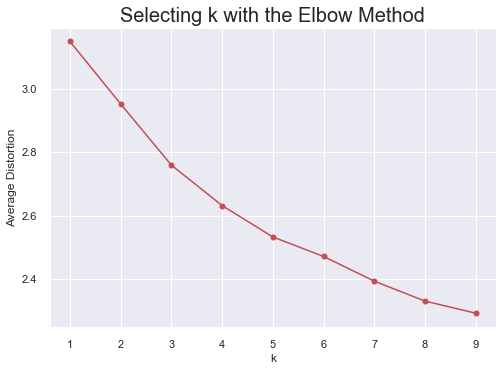

<IPython.core.display.Javascript object>

In [695]:
# Calculating Average Distortion for different number of clusters
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "ro-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

* k=4 or 5 looks optimal

**Let's check the silhouette scores.**

For n_clusters = 2, silhouette score is 0.15409747498549534
For n_clusters = 3, silhouette score is 0.1831911883278525
For n_clusters = 4, silhouette score is 0.17032646155721803
For n_clusters = 5, silhouette score is 0.14523162375371496
For n_clusters = 6, silhouette score is 0.1445955934878803
For n_clusters = 7, silhouette score is 0.1392203660244806
For n_clusters = 8, silhouette score is 0.13870521634490257
For n_clusters = 9, silhouette score is 0.1290712818732984


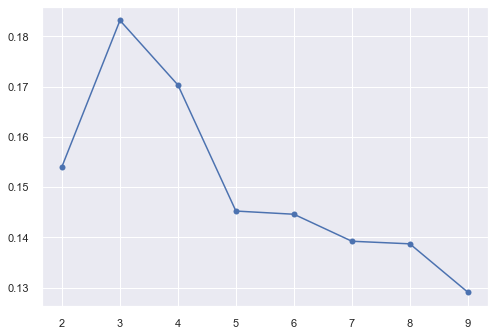

<IPython.core.display.Javascript object>

In [696]:
sil_score = []
cluster_list = list(range(2, 10))  # Sil_score can't be calculated for 1 cluster
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score, "bo-")

* Silhouette score for 3 is the highest, followed by 4. 

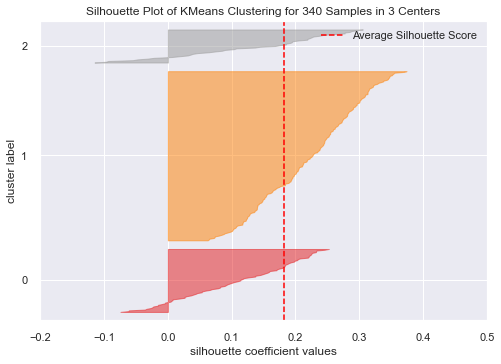

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [697]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

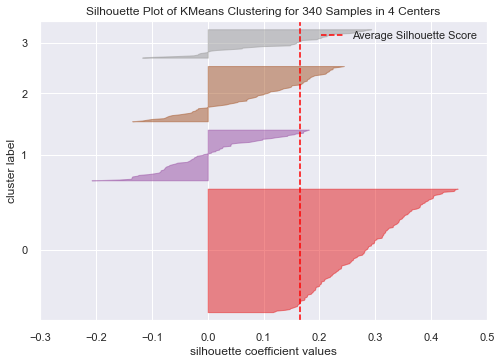

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [698]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

**Let's take 4 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 4 in the elbow curve.**

In [699]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [700]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [701]:
# adding kmeans cluster labels to the saled dataframe
subset_scaled_df["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [702]:
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [703]:
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
K_means_segments,,,,,,,,,,,
0,136.716386,8.829858,1.511349,24.410714,100.928571,6.672604e+07,1.109477e+09,5.789397,2.108662e+08,29.129424,2.044836
1,34.690758,-8.732570,2.296040,21.605263,75.078947,-4.859527e+07,-7.435387e+08,-1.182533,5.156060e+08,44.686411,2.730087
2,59.097027,4.487728,1.362675,17.541908,44.109827,-3.409447e+07,7.182702e+08,2.649046,2.841452e+08,23.116308,-3.143574
3,64.592333,7.387257,1.322600,24.018836,72.794521,3.346244e+07,3.411736e+09,4.325565,9.395514e+08,18.681981,-1.224821


<IPython.core.display.Javascript object>

In [704]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["ROE"].count().values
)

<IPython.core.display.Javascript object>

In [705]:
cluster_profile["count_in_each_segment"]

K_means_segments
0     56
1     38
2    173
3     73
Name: count_in_each_segment, dtype: int64

<IPython.core.display.Javascript object>

In [706]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,136.716386,8.829858,1.511349,24.410714,100.928571,66726035.714286,1109476555.803571,5.789397,210866175.900357,29.129424,2.044836,56
1,34.690758,-8.732570,2.296040,21.605263,75.078947,-48595266.447368,-743538713.815789,-1.182533,515605981.582303,44.686411,2.730087,38
2,59.097027,4.487728,1.362675,17.541908,44.109827,-34094471.820809,718270167.630058,2.649046,284145204.538570,23.116308,-3.143574,173
3,64.592333,7.387257,1.322600,24.018836,72.794521,33462441.780822,3411735700.342466,4.325565,939551375.141609,18.681981,-1.224821,73


<IPython.core.display.Javascript object>

* Cluster 0 has the maximum values for 6 of the variables: Current Price, Price change, ROE, Cash Ratio, Net Cash Flow, Earnings Per Share

In [707]:
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,136.716386,8.829858,1.511349,24.410714,100.928571,66726035.714286,1109476555.803571,5.789397,210866175.900357,29.129424,2.044836,56
1,34.690758,-8.732570,2.296040,21.605263,75.078947,-48595266.447368,-743538713.815789,-1.182533,515605981.582303,44.686411,2.730087,38
2,59.097027,4.487728,1.362675,17.541908,44.109827,-34094471.820809,718270167.630058,2.649046,284145204.538570,23.116308,-3.143574,173
3,64.592333,7.387257,1.322600,24.018836,72.794521,33462441.780822,3411735700.342466,4.325565,939551375.141609,18.681981,-1.224821,73


<IPython.core.display.Javascript object>

* Cluster 1 has the minimum values for 5 of the variables: Current Price, Price Change, Net Cash Flow, Net income, Earning per Share

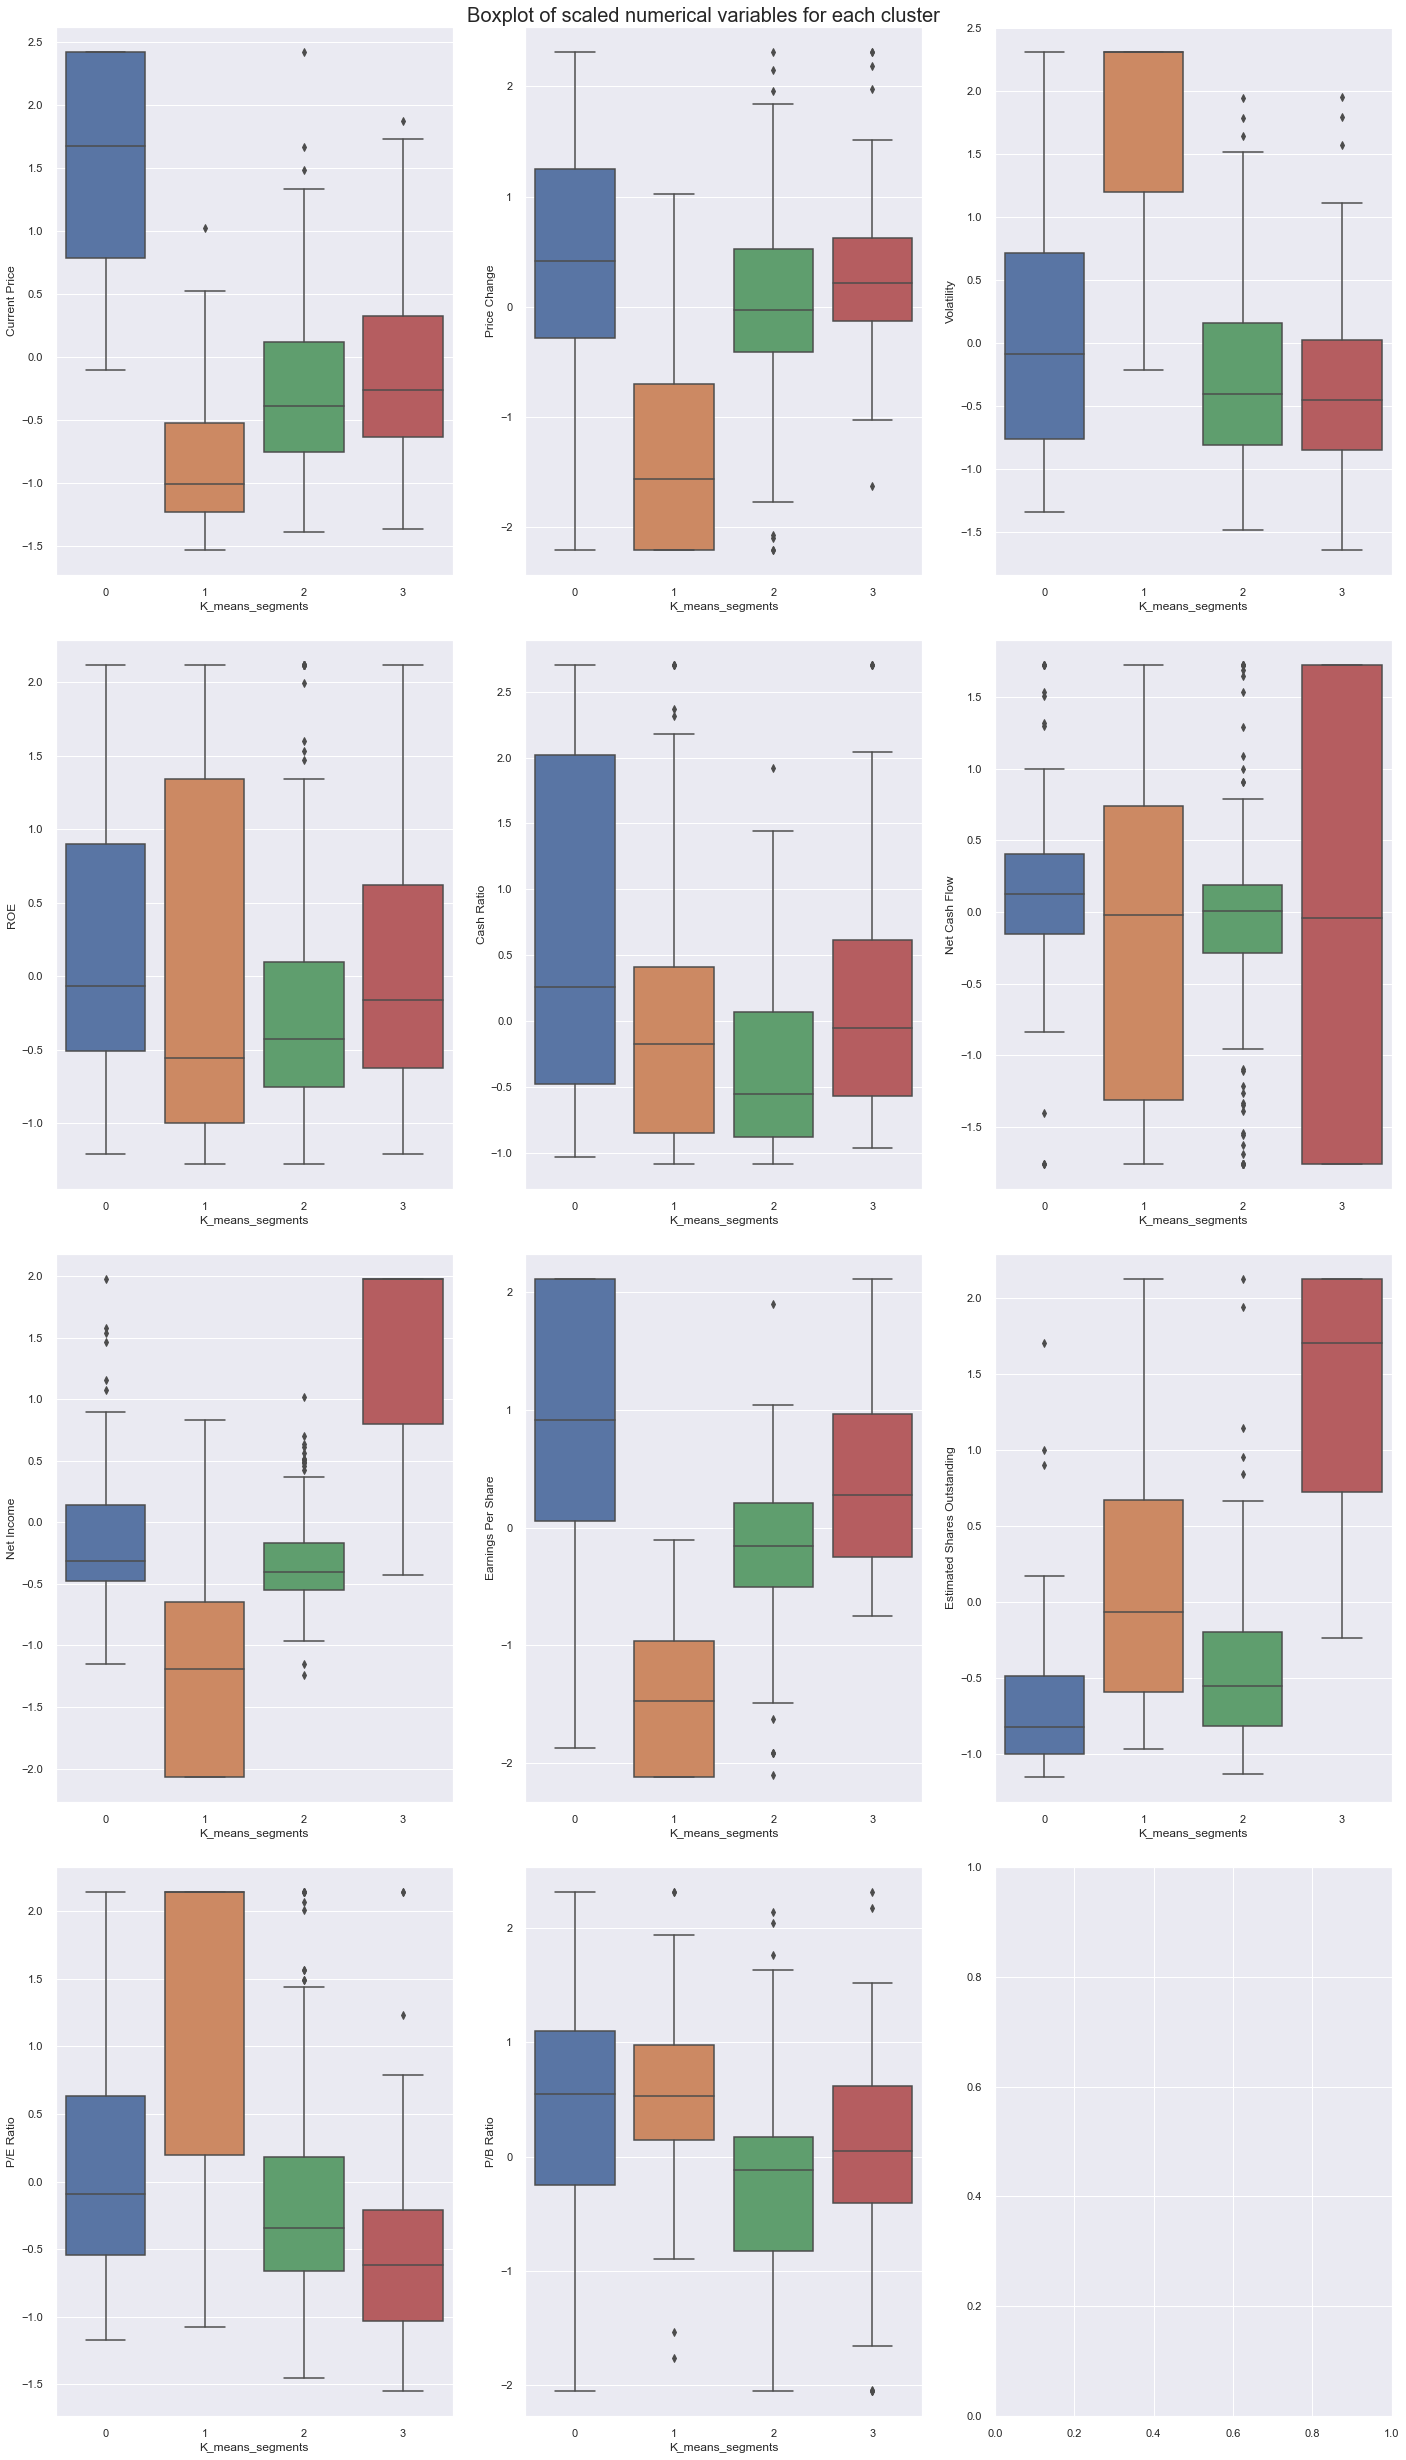

<IPython.core.display.Javascript object>

In [708]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=subset_scaled_df[num_col[counter]],
            x=subset_scaled_df["K_means_segments"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)

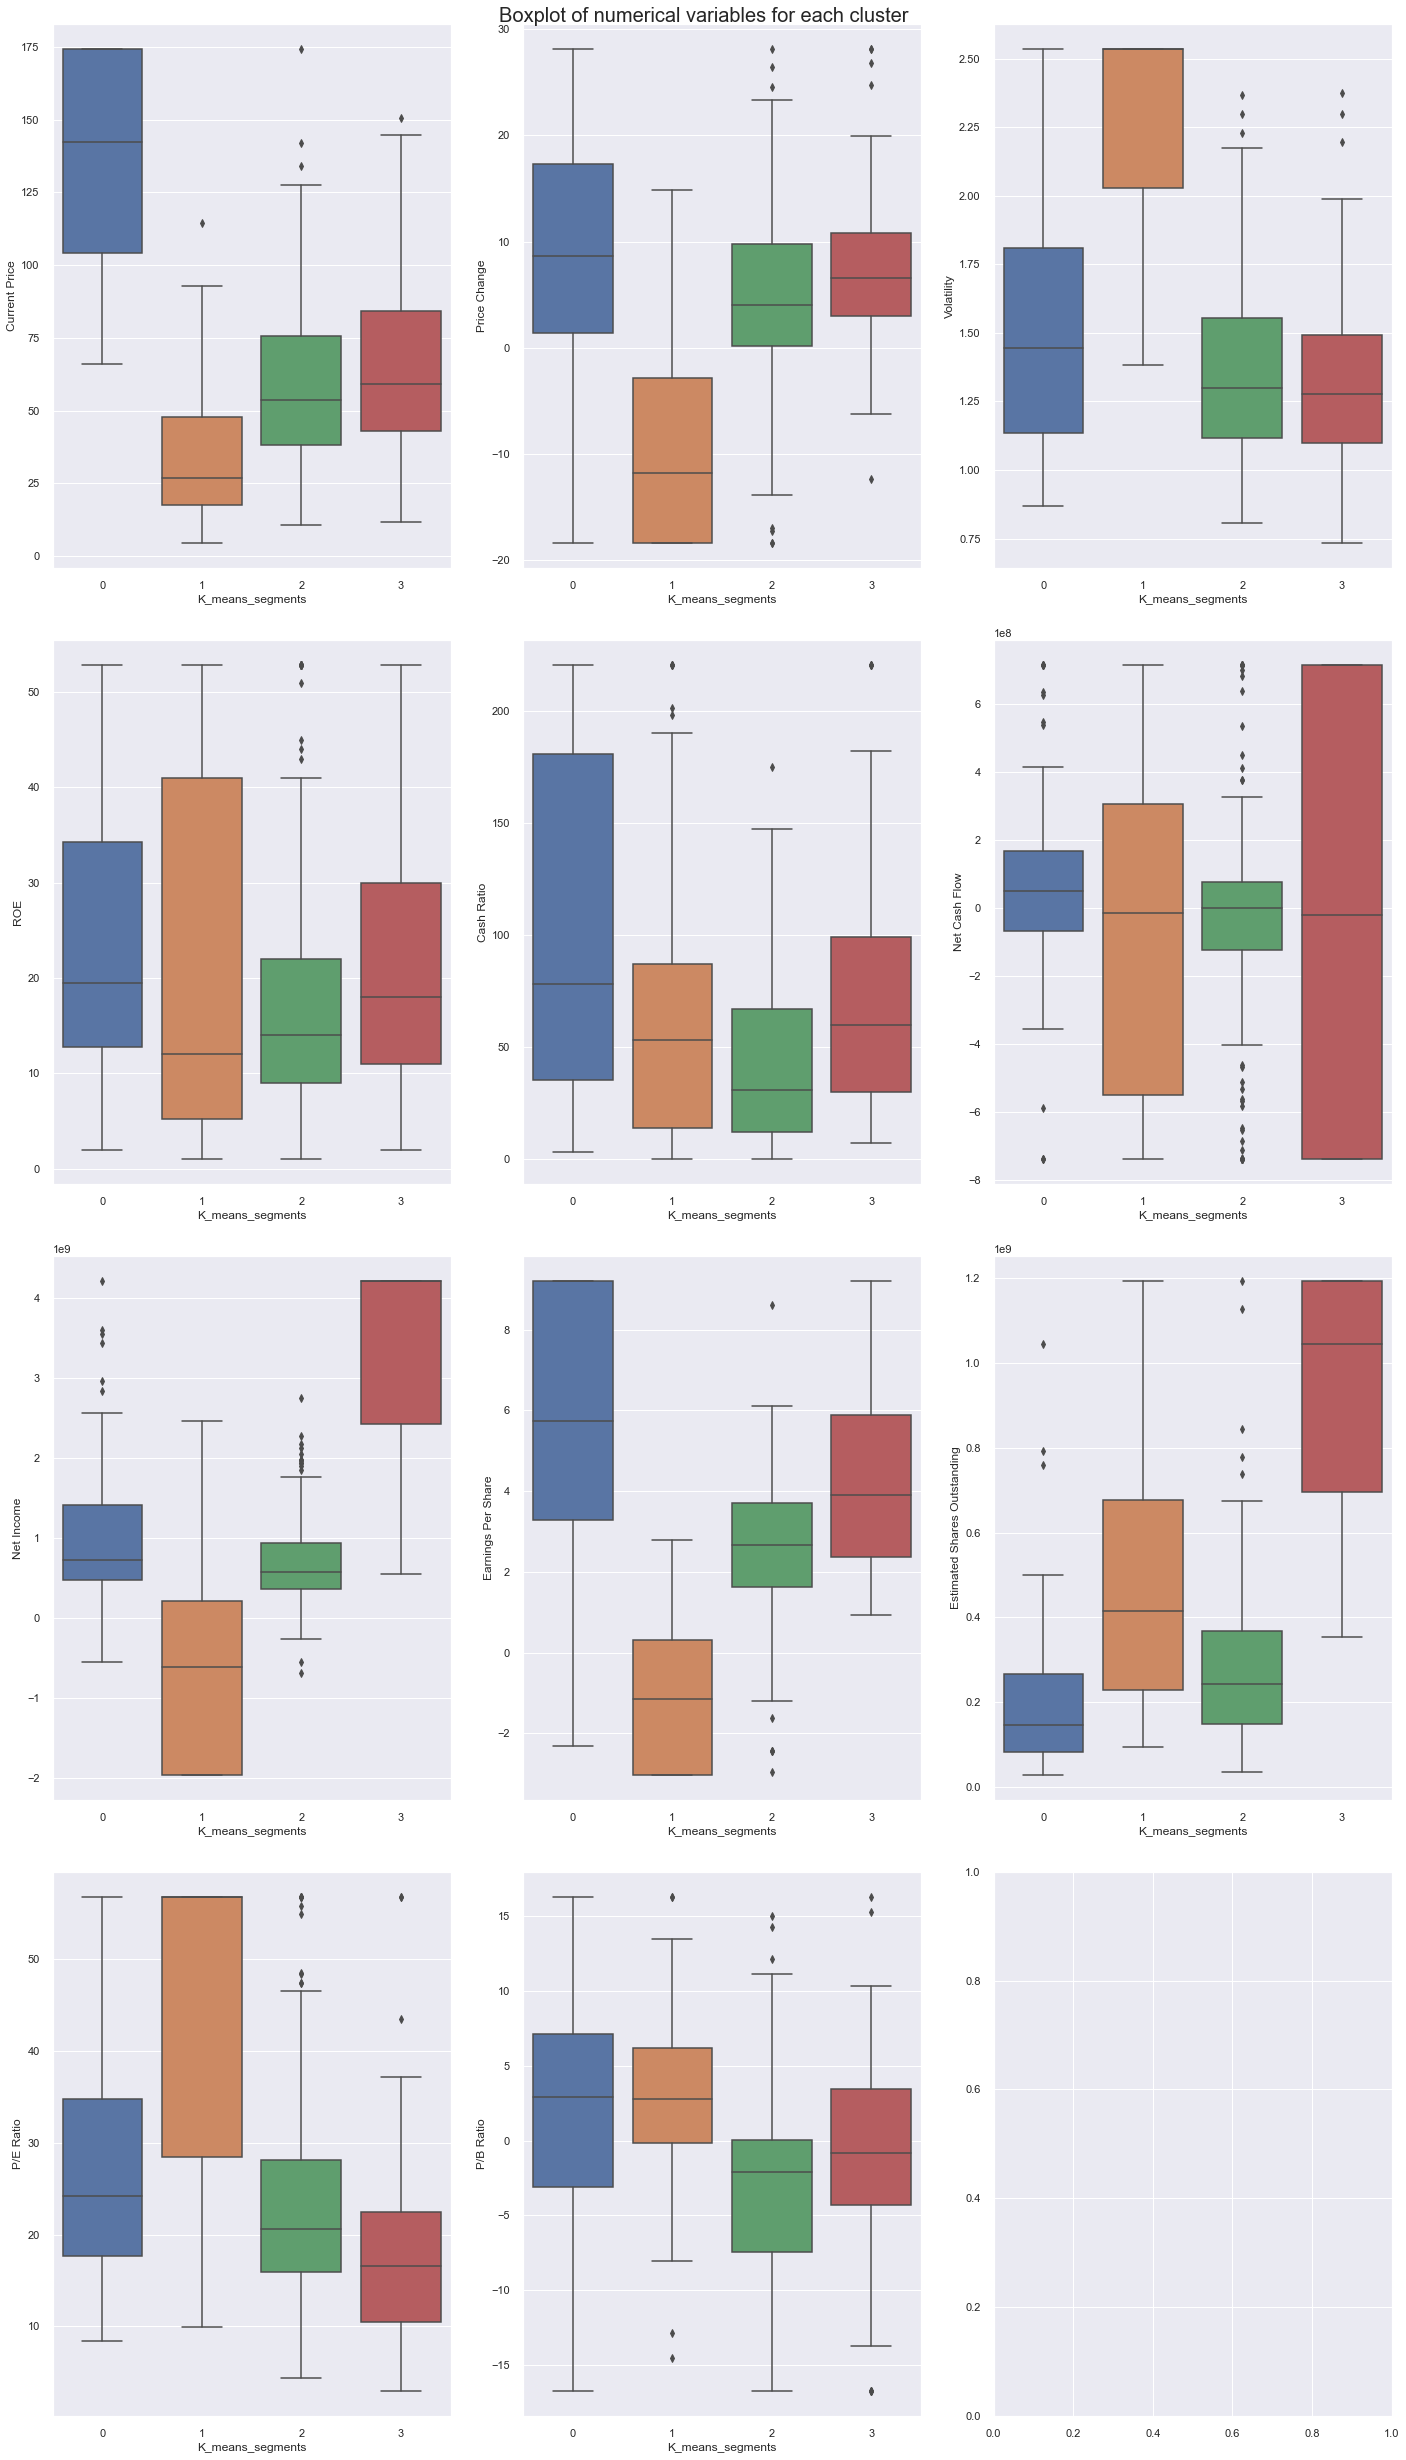

<IPython.core.display.Javascript object>

In [709]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=data[num_col[counter]],
        x=data["K_means_segments"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=data[num_col[counter]],
            x=data["K_means_segments"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)

**Original data in each cluster:**

<AxesSubplot:xlabel='K_means_segments'>

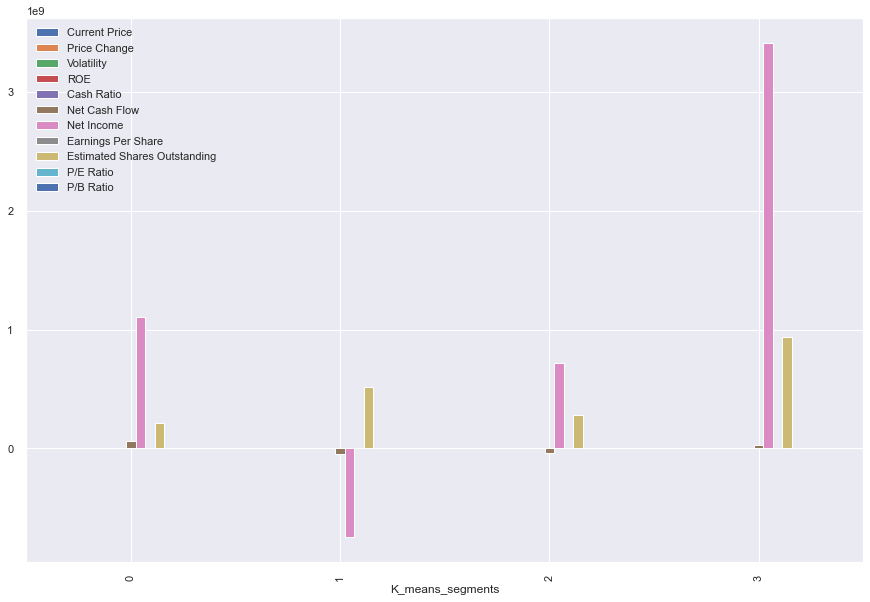

<IPython.core.display.Javascript object>

In [710]:
data.groupby("K_means_segments").mean().plot.bar(figsize=(15, 10))

Net Income, Estimated Shares Outstanding and Net Cash flow have values in the order of 10^9 and others are in 100s or less and hence only theses 3 plots are visible in the graph. We will use the scaled values to get insights of the clusters.

**Scaled values in each cluster:**

<AxesSubplot:xlabel='K_means_segments'>

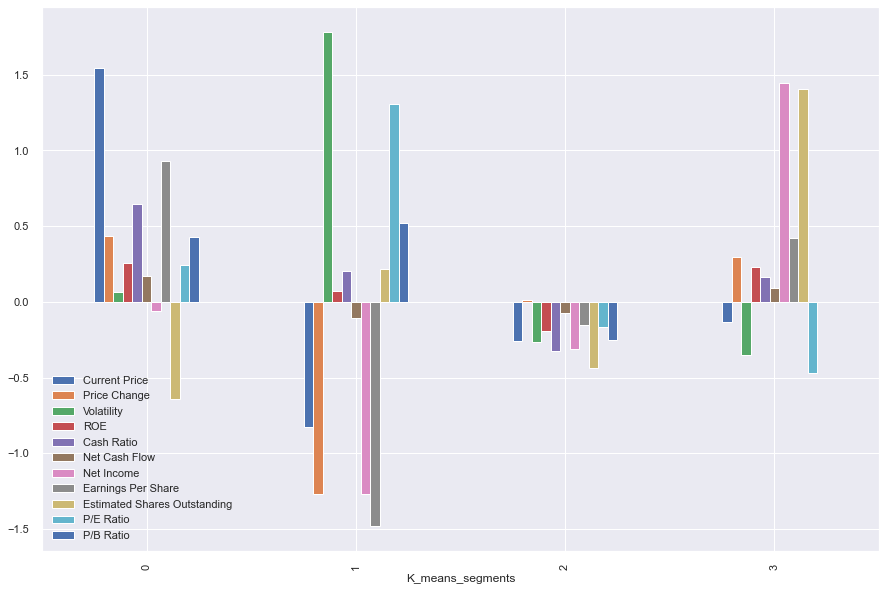

<IPython.core.display.Javascript object>

In [711]:
subset_scaled_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 10))


### Insights

- **Cluster 0**:
    - There are 56 Companies 
    - Current Price, Price change, ROE, Cash Ratio, Net Cash Flow, Earnings Per Share are the highest here.
    - Net Income is the lowest.


- **Cluster 1**:
    - There are 38 Companies
    - Volatality is the highest followed by P/E Ratio.
    - P/B ratio is moderate.
    - Earnings per share, Net income, Price change and Current price are the lowest.
    

- **Cluster 2**:
    - There are 173 Companies
    - All variables are negative except Price change.
    - All values are also very small (<-0.5).


- **Cluster 3**:
    - There are 73 Companies
    - Net income and Estimated Shares Outstanding have the highest values.
    - P/E ratio, Volatality and Current Price are negative.





Removing the column K_means_segments from original data and scaled data to perform hierarchical clustering:

In [712]:
subset_scaled_df.drop(columns=["K_means_segments"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [713]:
data.drop(columns=["K_means_segments"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [714]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    float64
 8   Cash Ratio                    340 non-null    float64
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

## Hierarchical Clustering

In [715]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136775.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988988.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746495.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170997.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3854304450443974.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925732.
Cophenetic c

<IPython.core.display.Javascript object>

In [716]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988988, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [717]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6932108674136775.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988988.
Cophenetic correlation for centroid linkage is 0.7294329307928588.
Cophenetic correlation for ward linkage is 0.5753306117577638.
Cophenetic correlation for weighted linkage is 0.6496438783746495.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is maximum with Euclidean distance with average and centroid linkages.**

**Let's see the dendrograms for the different linkage methods.**

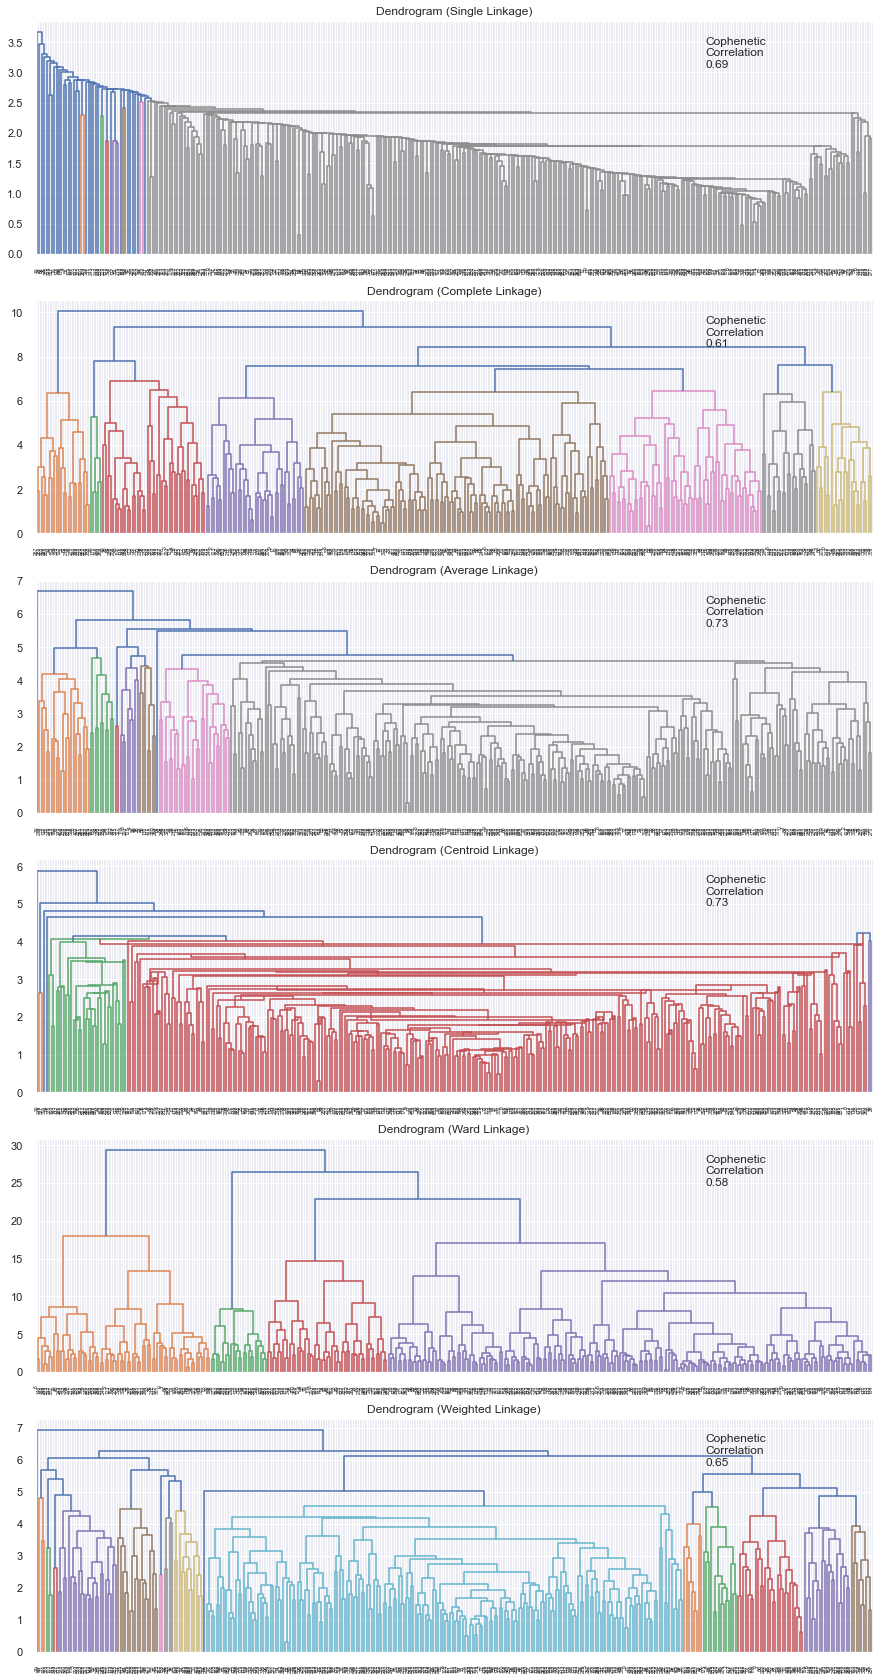

<IPython.core.display.Javascript object>

In [718]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

Even though Centroid and Average linkages have the highest cophenetic correlation, From the dendograms we can see that Ward linkage has clear, well defined and more evenly spread out clusters compared to the others. So we can choose **Euclidean distance** with **Ward linkage** and **4** clusters. 

In [719]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

<IPython.core.display.Javascript object>

In [720]:
# Adding a column indicating the cluster number
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [721]:
# Creating cluster profile with mean of each variable in te clusters with original data
cluster_profile = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [722]:
# Counting number of Companies/Securities in each cluster
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [723]:
# let's see the names of the Securities in each cluster
for cl in data["HC_Clusters"].unique():
    print(
        "The",
        data[data["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(data[data["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 71 Securities in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Alliance Data Systems' 'American International Group, Inc.'
 'Alaska Air Group Inc' 'Amgen Inc' 'Broadcom' 'American Express Co'
 'Boeing Company' 'Bank of America Corp' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Citigroup Inc.'
 'Chipotle Mexican Grill' 'Capital One Financial' 'CVS Health'
 'Chevron Corp.' 'Delta Air Lines' 'Danaher Corp.'
 'The Walt Disney Company' 'Duke Energy' 'Eaton Corporation' 'Ford Motor'
 'General Dynamics' 'Gilead Sciences' 'General Motors'
 'Grainger (W.W.) Inc.' "Honeywell Int'l Inc."
 'International Business Machines' 'Intel Corp.' 'JPMorgan Chase & Co.'
 'Coca Cola Company' 'Laboratory Corp. of America Holding'
 'Lilly (Eli) & Co.' 'Lockheed Martin Corp.' 'Level 3 Communications'
 'LyondellBasell' 'Mastercard Inc.' "McDonald's Corp."
 'Mondelez International' 'MetLife Inc.' '3M Company' 'Altria Group Inc'
 'Merck & Co.' 'M&T Bank Corp.' 'Mettler T

<IPython.core.display.Javascript object>

In [724]:
# Number of Companies in each Cluster
cluster_profile["count_in_each_segments"]

HC_Clusters
0     71
1    197
2     23
3     49
Name: count_in_each_segments, dtype: int64

<IPython.core.display.Javascript object>

In [725]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,92.264676,6.207562,1.303518,28.044014,67.274648,-9445112.676056,3387592945.422535,5.884894,756266701.881760,17.248779,-0.886916,71
1,67.842897,4.165814,1.379430,17.510152,43.710660,-22317788.705584,791304172.588832,3.002418,274869321.770762,23.712726,-3.088535,197
2,32.947827,-11.234540,2.393770,31.478261,43.347826,-136632809.782609,-1356654576.086957,-2.242609,473814086.308804,50.100914,0.689859,23
3,66.117340,9.699455,1.731088,16.561224,144.193878,135596214.285714,856952964.285714,1.950969,620489545.173673,33.547876,4.909174,49


<IPython.core.display.Javascript object>

* Cluster 0 has the maximum values for 4 of the variables: Current Price, Net Income, Earnings Per Share and Estimated Outstandings.
* Cluster 2 has the maximum values for 4 of the variables: Price Change, Cash Ratio, Net Cash Flow and P/B Ratio.

In [726]:
cluster_profile.style.highlight_min(color="lightblue", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,92.264676,6.207562,1.303518,28.044014,67.274648,-9445112.676056,3387592945.422535,5.884894,756266701.881760,17.248779,-0.886916,71
1,67.842897,4.165814,1.379430,17.510152,43.710660,-22317788.705584,791304172.588832,3.002418,274869321.770762,23.712726,-3.088535,197
2,32.947827,-11.234540,2.393770,31.478261,43.347826,-136632809.782609,-1356654576.086957,-2.242609,473814086.308804,50.100914,0.689859,23
3,66.117340,9.699455,1.731088,16.561224,144.193878,135596214.285714,856952964.285714,1.950969,620489545.173673,33.547876,4.909174,49


<IPython.core.display.Javascript object>

* Cluster 2 has the minimum values for 6 of the variables: Current Price, Price Change, Cash Ratio, Net Cash Flow, Net income and Earning per Share

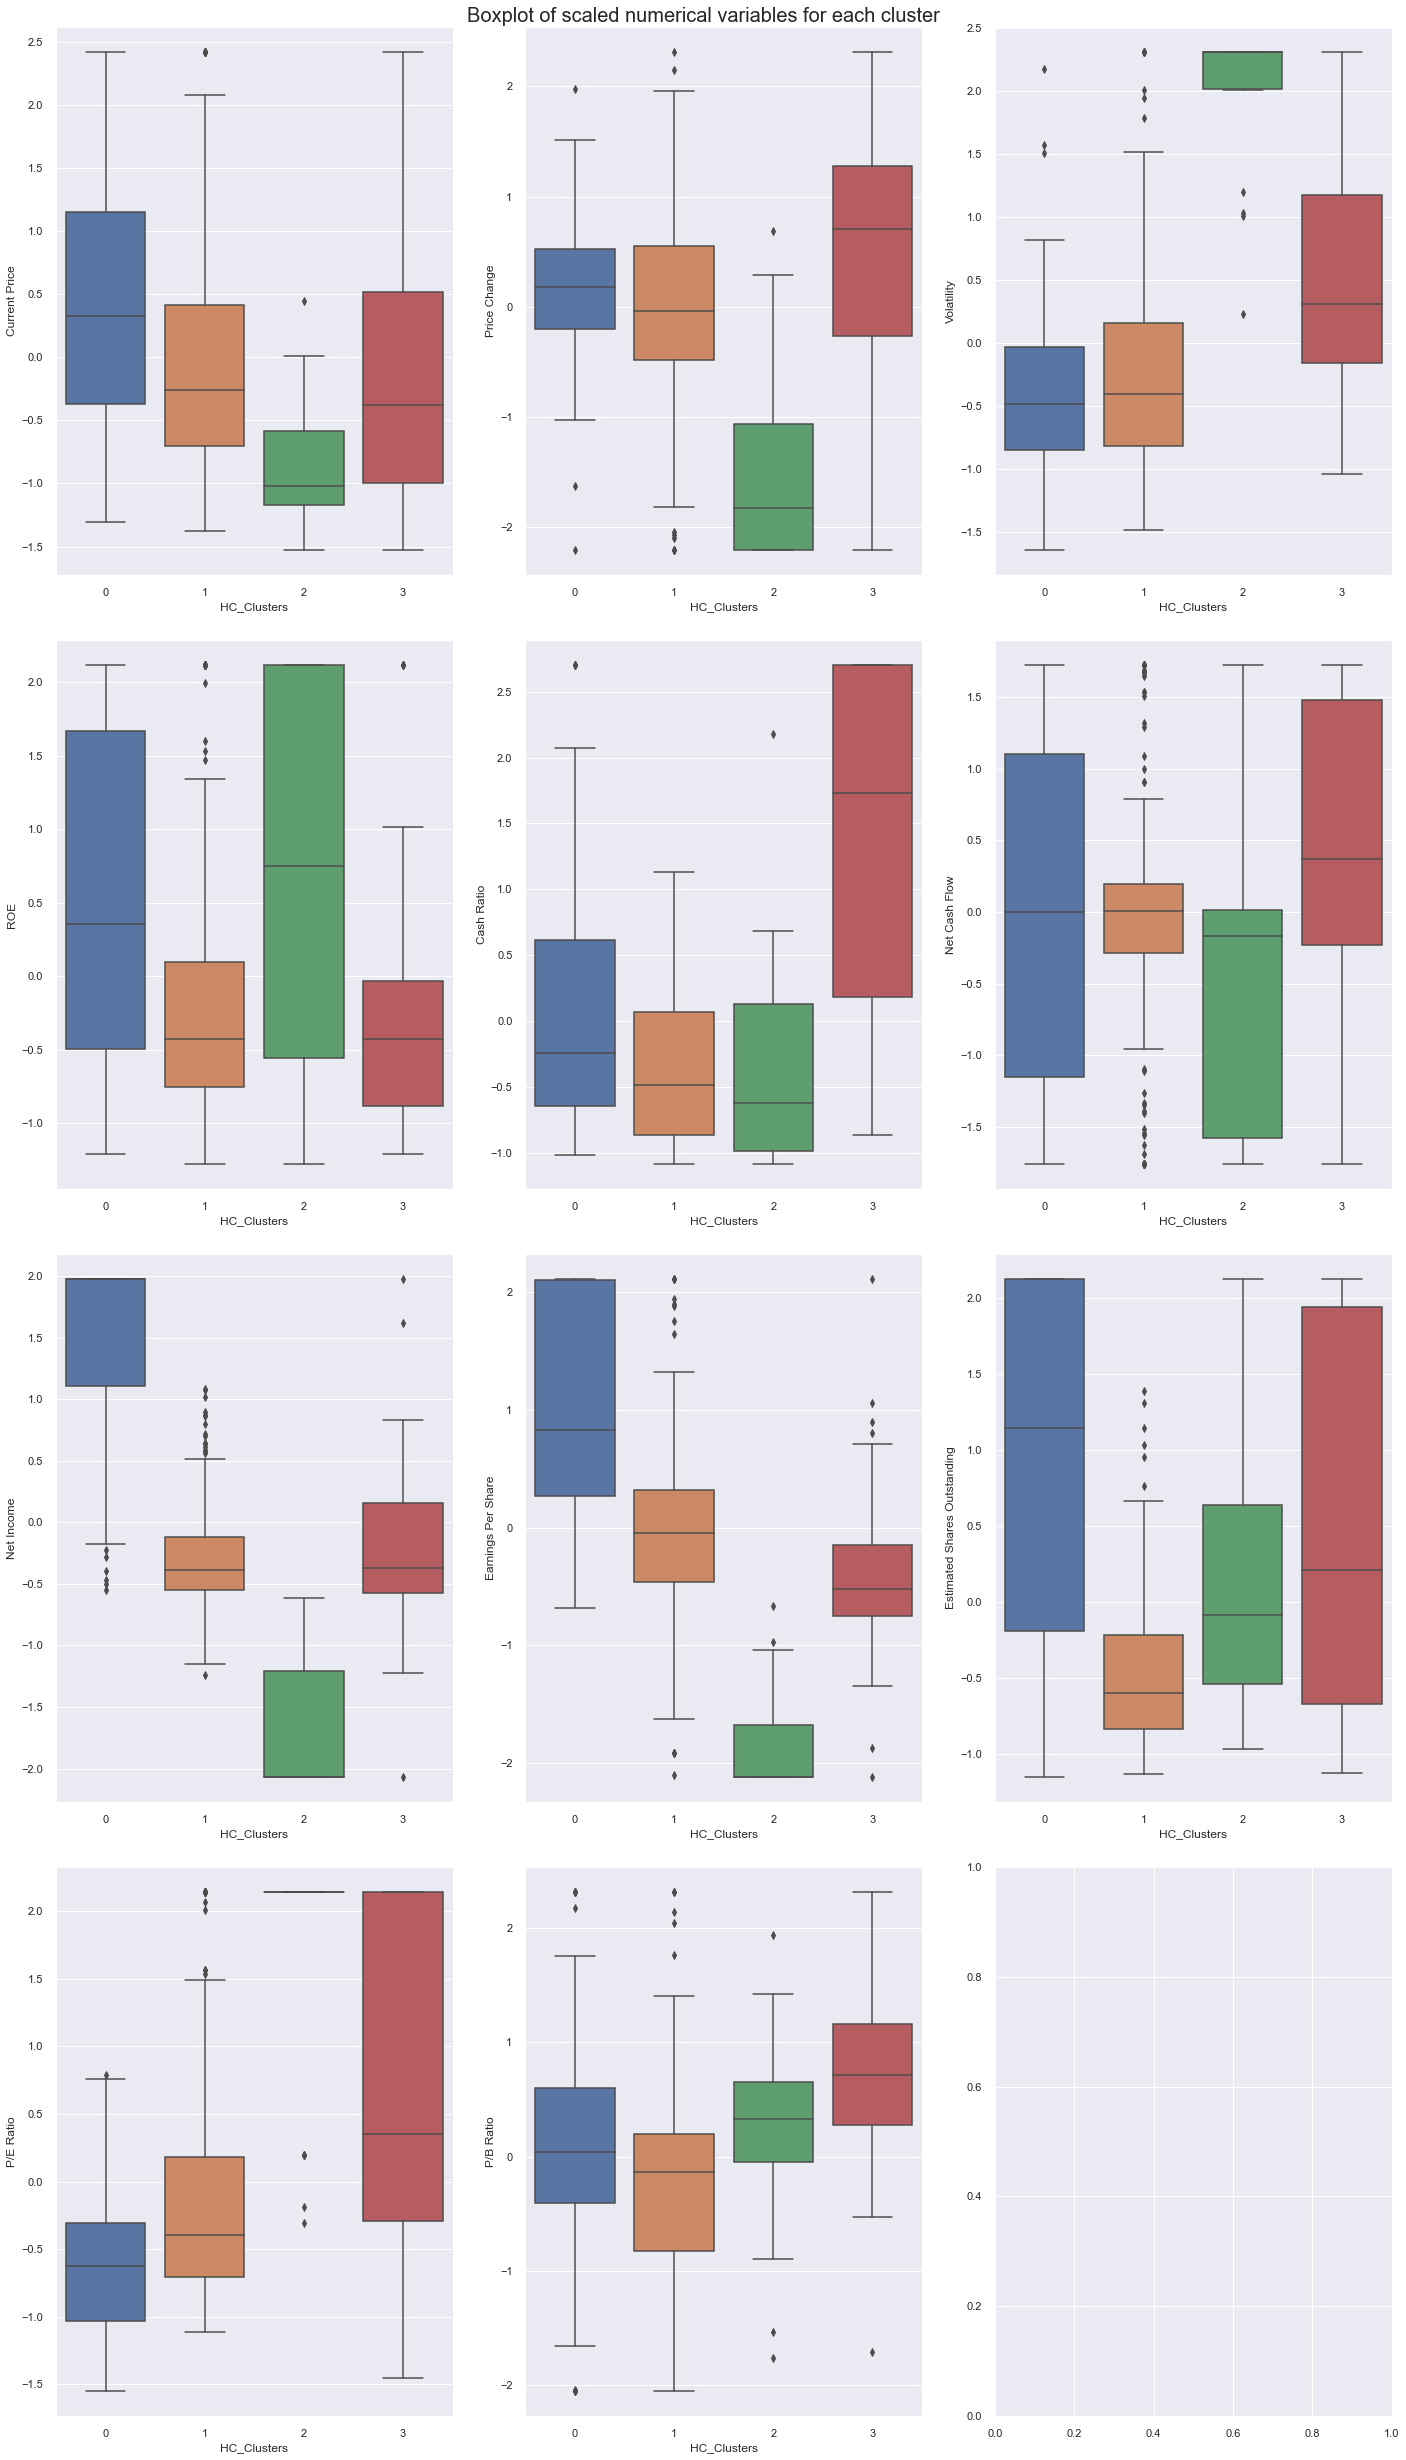

<IPython.core.display.Javascript object>

In [727]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=subset_scaled_df[num_col[counter]],
            x=subset_scaled_df["HC_Clusters"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)


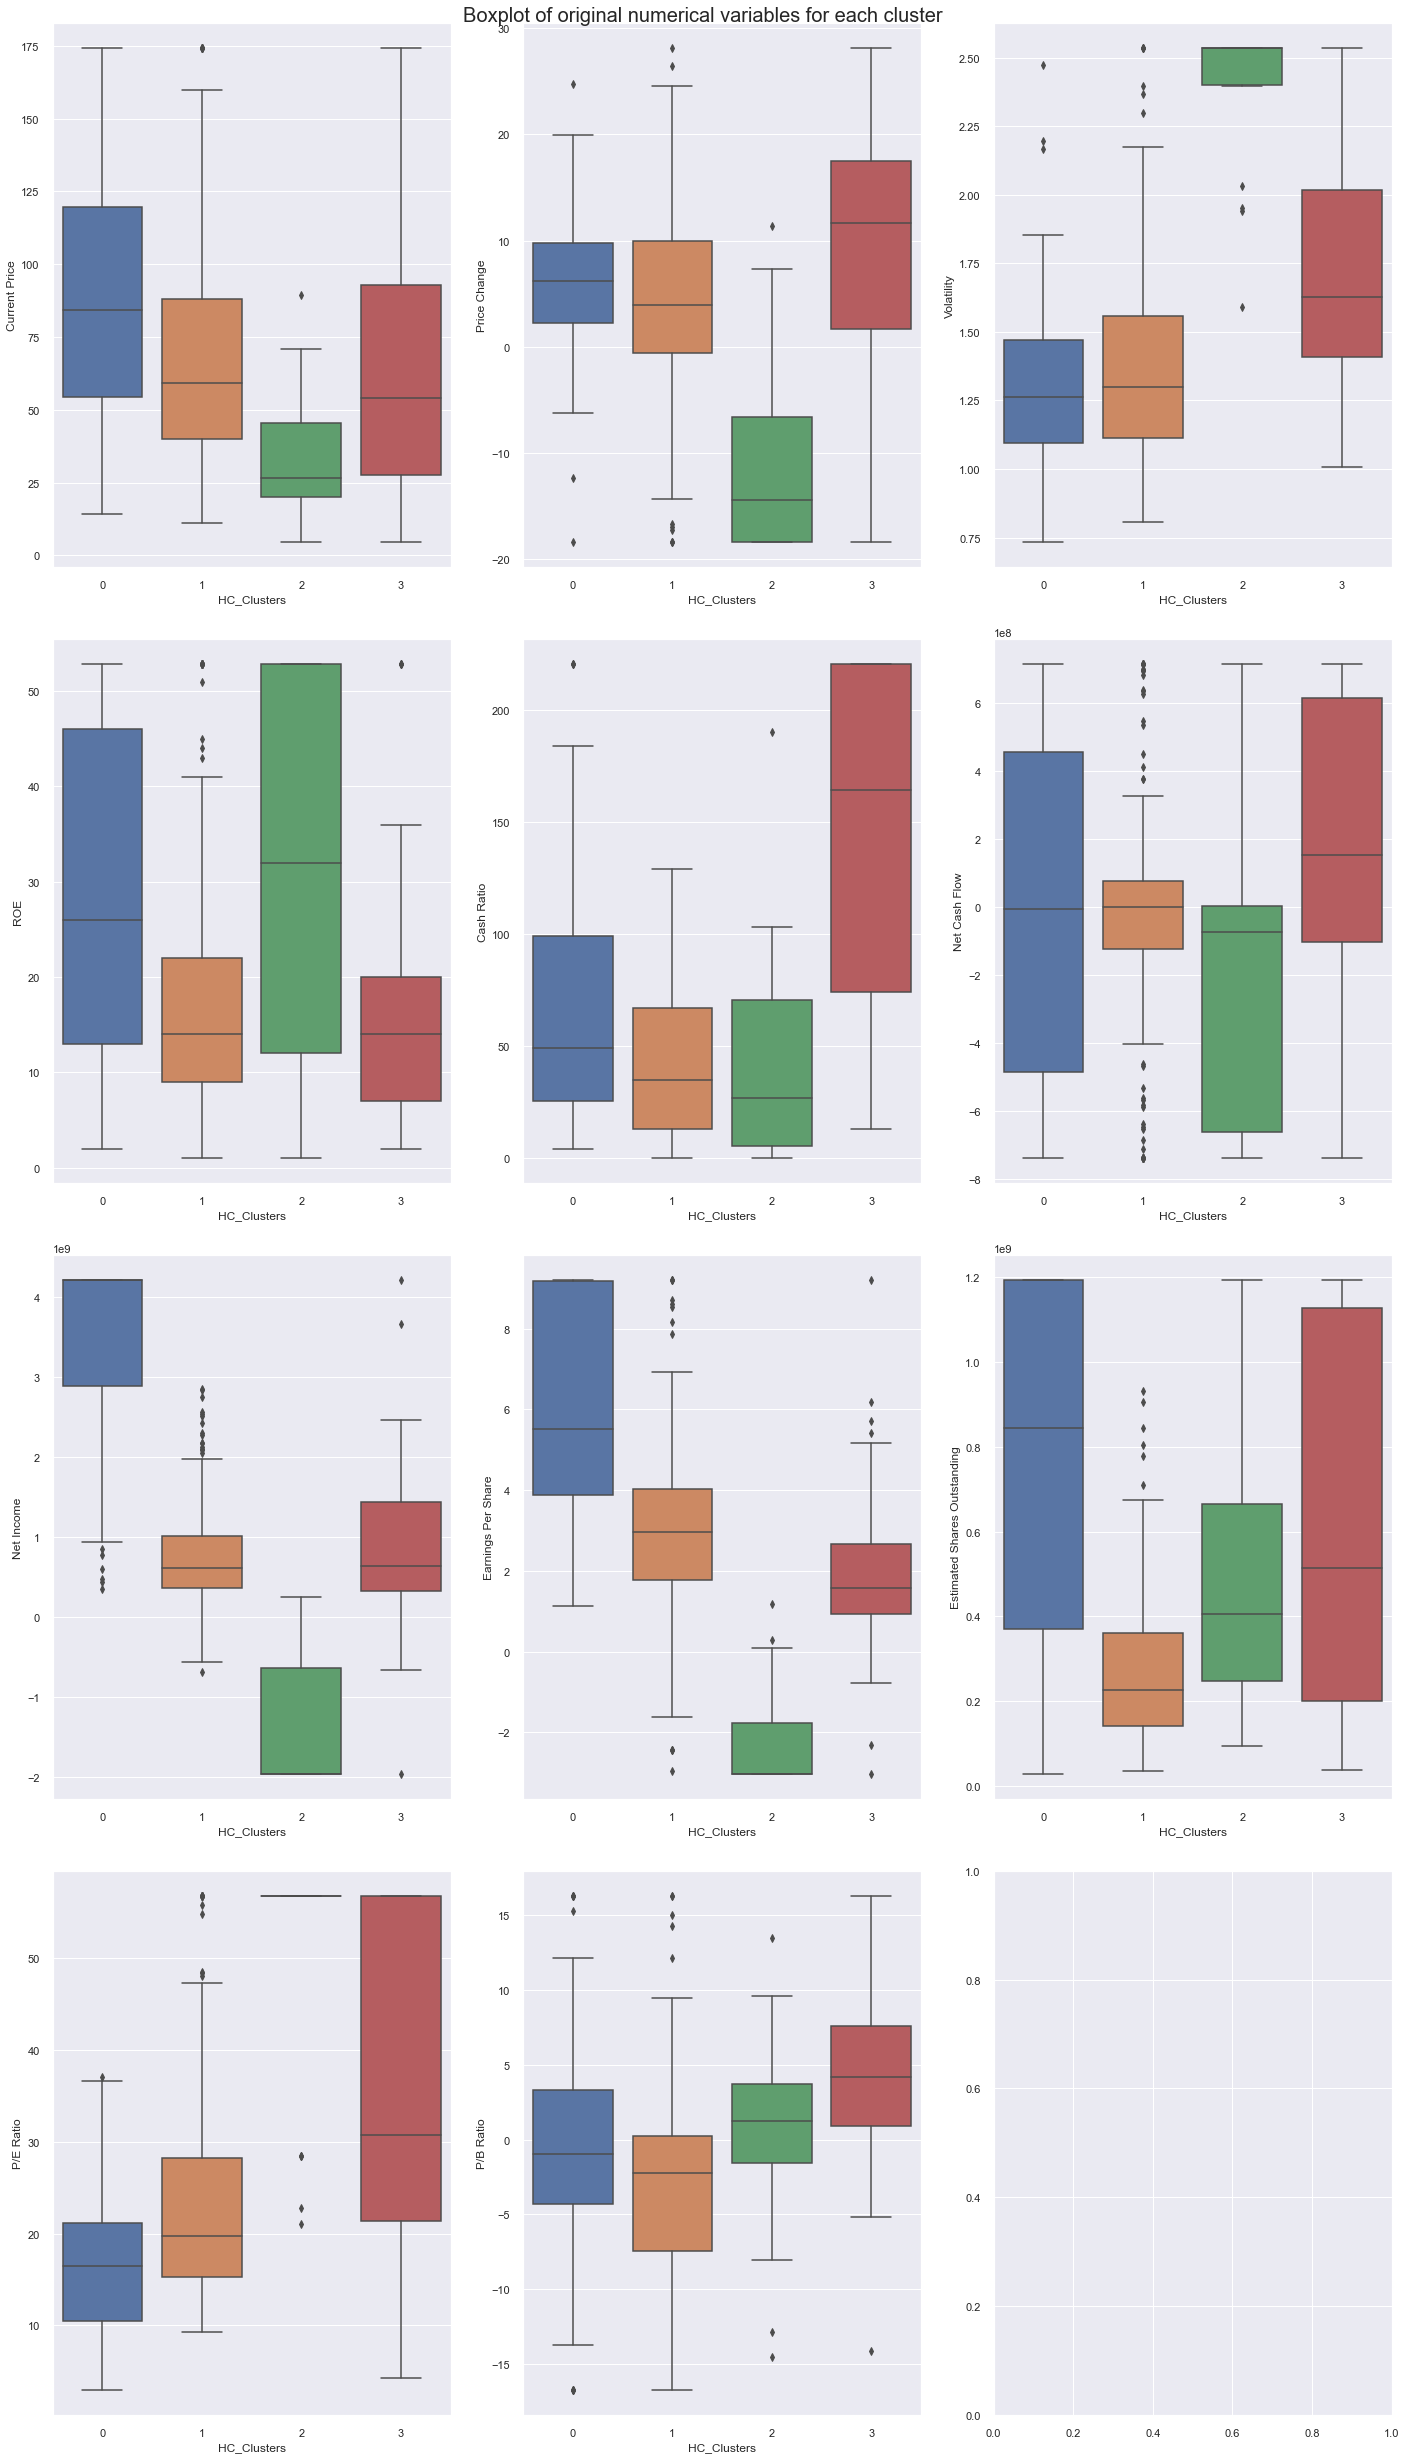

<IPython.core.display.Javascript object>

In [728]:
fig, axes = plt.subplots(4, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(4):
    sns.boxplot(
        ax=axes[ii][0],
        y=data[num_col[counter]],
        x=data["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=data[num_col[counter]],
        x=data["HC_Clusters"],
    )
    counter = counter + 1
    if counter < 11:
        sns.boxplot(
            ax=axes[ii][2],
            y=data[num_col[counter]],
            x=data["HC_Clusters"],
        )
    counter = counter + 1


fig.tight_layout(pad=2.0)

**Original data in each cluster:**

<AxesSubplot:xlabel='HC_Clusters'>

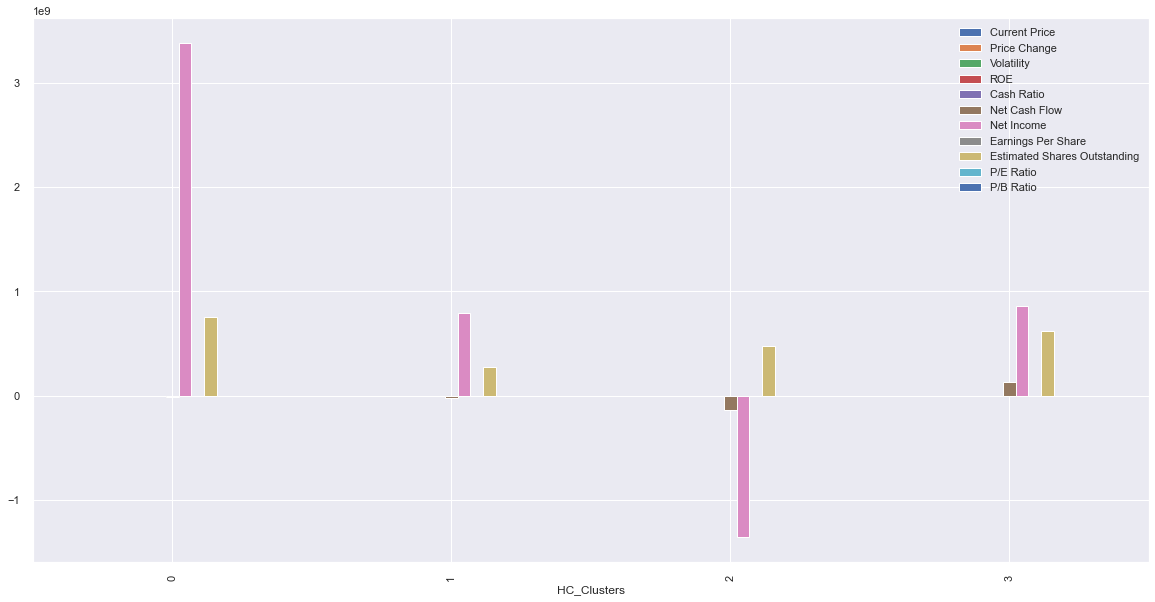

<IPython.core.display.Javascript object>

In [729]:
data.groupby("HC_Clusters").mean().plot.bar(figsize=(20, 10))

Net Income, Estimated Shares Outstanding and Net Cash flow have values in the order of 10^9 and others are in 100s or less and hence only theses 3 plots are visible in the graph. We will use the scaled values to get insights of the clusters.

**Scaled values in each cluster:**

<AxesSubplot:xlabel='HC_Clusters'>

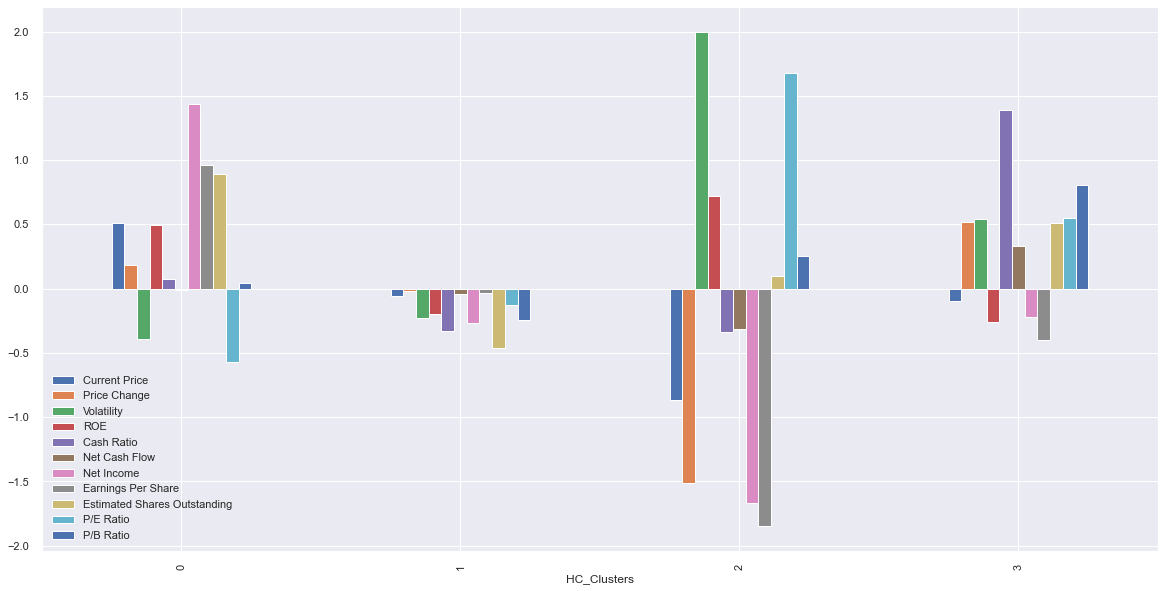

<IPython.core.display.Javascript object>

In [730]:
subset_scaled_df.groupby("HC_Clusters").mean().plot.bar(figsize=(20, 10))


### Insights

- **Cluster 0**:
    - There are 71 Companies 
    - Net Income is the highest here, followed by Earnings per share and Estimated shares outstanding
    - Current Price and  ROE are moderate.
    - P/E Ratio is the lowest.


- **Cluster 1**:
    - There are 197 Companies
    - All variables are negative.
    - All values are also very small (<-0.5).
    
    
- **Cluster 2**:
    - There are 23 Companies
    - Volatality, ROE and P/E Ratio have the highest values.
    - Earnings per share, Net income, Price change and Current price are the lowest and negative.


- **Cluster 3**:
    - There are 49 Companies
    - Cash Ratio and P/B Ratio are high
    - Price Change, Volatality, Estimated shares outstanding and P/E Ratio are moderate.

## K-means vs Hierarchical Clustering

**K-means Clustering**
* Number of clusters = 4
* More spread out numbers in each cluster
* Maximum values in Cluster 0
* Minimum values in Cluster 1
* Less running time

**Hierchical Clustering**
* 4 Clusters
* Cluster 1 has more than 50% of the companies and Cluster 2 is very small
* Maximum values in Clusters 0 and 2
* Minimum values in Cluster 2
* Higher running time (during calculating Cophenetic correlation and plotting Dendrograms)


## Actionable Insights and Recommendations



Considering clusters from K-means clustering (due to lower run time):
* Cluster 0 is the most beneficial as it has high values in important variables like Current Price,  Cash Ratio, Net Cash Flow, Earnings Per Share and Number of companies is neither too high nor too low. 
* Cluster 3 can be the next suitable as it has only P/E Ratio and Volatility with lowest values. Other variables are moderately high.
* Cluster 1 has the lowest values in Earnings per share, Net income, Price change and Current price. This can be the next favorable one.
* Cluster 2 has all negative values and so the least favorable one.
